# PROYECTO FINAL DATA ANALYCS

## EL DATASET

El archivo ipf_lifts.csv contiene registros detallados de las competiciones de powerlifting, incluyendo información sobre los atletas, su rendimiento y los eventos en los que participaron. A continuación, se detallan las columnas clave y sus significados:

nombre: Nombre del atleta.

sexo: Género del atleta (M para masculino, F para femenino).

evento: Tipo de evento (p. ej., SBD para sentadillas, press de banca y peso muerto; B solo para press de banca).

equipo: Tipo de equipo utilizado (p. ej., monocapa, sin equipo).

edad: Edad del atleta en el momento de la competición.

clase_edad: Categoría de edad del atleta (p. ej., 20-23, 24-34).

división: División en la que compitió el atleta (p. ej., Open).

peso_corporal_kg: Peso corporal del atleta en kilogramos.

clase_peso_kg: Categoría de peso en la que compitió el atleta.

best3squat_kg: El mejor levantamiento de sentadilla en kilogramos.

best3bench_kg: El mejor levantamiento de press de banca en kilogramos.

best3deadlift_kg: El mejor peso muerto en kilogramos.

place: La posición que el atleta logró en la competencia.

date: La fecha de la competencia.

federation: La federación que organizó la competencia (p. ej., IPF para la Federación Internacional de Powerlifting).

meet_name: El nombre de la competencia (p. ej., Juegos Mundiales, Campeonato Mundial de Press de Banca).

Ejemplos de Entradas:

Hiroyuki Isagawa: Compitió en la prueba SBD (Sentadilla, Press de Banca, Peso Muerto) con equipo de una sola capa. Pesó 67.5 kg y compitió en la categoría de 67.5 kg. Sus mejores levantamientos fueron 205.0 kg en sentadilla, 140.0 kg en press de banca y 225.0 kg en peso muerto. Obtuvo el primer puesto en los Juegos Mundiales el 3 de agosto de 1985, organizados por la IPF.

Andrzej Stanaszek: Compitió en la prueba de press de banca con equipo Raw. Pesó 51 kg y compitió en la categoría de 52 kg. Su mejor press de banca fue de 157,5 kg y obtuvo el primer puesto en el Campeonato Mundial de Press de Banca el 12 de diciembre de 1993, organizado por la IPF.

Observaciones:

El conjunto de datos abarca varios años (p. ej., 1985, 1993) e incluye diversas competiciones como los Juegos Mundiales, el Campeonato Mundial de Press de Banca y el Campeonato Mundial de Powerlifting.

Los atletas están clasificados por edad, categoría de peso y división.

El conjunto de datos incluye atletas tanto masculinos como femeninos.

En algunas entradas faltan datos (p. ej., edad, peso corporal), y algunos atletas fueron descalificados (DQ) en ciertas pruebas.

# Descripcion de las siguientes categorias

En powerlifting, estos términos se refieren a distintos tipos de equipo utilizado para mejorar el rendimiento y proporcionar soporte durante los levantamientos:

- Single-Ply → Equipamiento de una sola capa, permitido en equipped powerlifting.
- Raw → Levantamiento sin trajes ni camisas asistidas, solo con equipo básico.
- Wraps → Soporte elástico en rodillas o muñecas, usado en ambas categorías según la federación.

['SBD' 'B' 'SB']

- SBD → Squat (Sentadilla) - Bench Press (Press de Banca) - Deadlift (Peso Muerto)
- B → Bench Press (Press de Banca)
- SB → Squat (Sentadilla) - Bench Press (Press de Banca)

## Justificación del uso de este dataset para un proyecto de análisis de datos

#### Naturaleza de los datos y variables disponibles

Este dataset es ideal para un proyecto de análisis de datos por las siguientes razones:

- Variables numéricas y categóricas:

    - Numéricas: bodyweight_kg, best3squat_kg, best3bench_kg, best3deadlift_kg, age.

    - Categóricas: sex, event, equipment, age_class, division.

    - Estas variables permiten realizar análisis descriptivos, predictivos y comparativos.

- Componente temporal:

    - La columna date permite realizar análisis de series de tiempo para estudiar tendencias y patrones a lo largo del tiempo.

- Diversidad de eventos y categorías:

    - Los datos incluyen diferentes tipos de eventos (SBD, B) y categorías de peso y edad, lo que permite análisis segmentados.

-  Aplicaciones potenciales:

    - Predicción de rendimiento: Predecir el peso que un atleta puede levantar en función de su peso corporal, edad y sexo.

    - Análisis de tendencias: Estudiar cómo ha evolucionado el rendimiento en powerlifting a lo largo del tiempo.

    - Comparación entre categorías: Comparar el rendimiento entre diferentes categorías de peso, edad o sexo.

    - Optimización de entrenamiento: Identificar factores que influyen en el rendimiento para mejorar los programas de entrenamiento.

-  #### Calidad de los datos:

    El dataset parece estar bien estructurado, con columnas claras y datos completos (aunque es importante verificar y limpiar los datos antes del análisis).

LIBRERIAS

In [918]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import requests
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt


FUNCIONES

In [919]:
# Función para evaluar modelos
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Predecir
    y_pred = model.predict(X_test)
    
    # Calcular métricas
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    return rmse, r2

PROCEDIMIENTO

In [920]:
# URL del archivo CSV en internet
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2019/2019-10-08/ipf_lifts.csv"

# Descargar el contenido del archivo CSV
response = requests.get(url)

# Verificar que la solicitud fue exitosa
if response.status_code == 200:
    # Leer el contenido del archivo CSV
    csv_data = StringIO(response.text)
    
    # Cargar el CSV en un DataFrame de pandas
    df = pd.read_csv(csv_data)
    
    # Guardar el DataFrame en un archivo CSV local
    df.to_csv("ipf_lifts.csv", index=False)
    
    print("Archivo guardado exitosamente como 'ipf_lifts.csv'")
else:
    print(f"Error al descargar el archivo: {response.status_code}")

Archivo guardado exitosamente como 'ipf_lifts.csv'


In [921]:
# Cargar el dataset
df = pd.read_csv("ipf_lifts.csv")

EDA

##### Informacion General
- Tipos de datos y datos nulos
- Estadisticas generales (promedio, min, max, 25%, 75%, desv std)
- Valores unicos

In [922]:
df.info() # tipos de datos y datos nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41152 entries, 0 to 41151
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              41152 non-null  object 
 1   sex               41152 non-null  object 
 2   event             41152 non-null  object 
 3   equipment         41152 non-null  object 
 4   age               38246 non-null  float64
 5   age_class         38268 non-null  object 
 6   division          40525 non-null  object 
 7   bodyweight_kg     40965 non-null  float64
 8   weight_class_kg   41151 non-null  object 
 9   best3squat_kg     27454 non-null  float64
 10  best3bench_kg     38690 non-null  float64
 11  best3deadlift_kg  27124 non-null  float64
 12  place             41152 non-null  object 
 13  date              41152 non-null  object 
 14  federation        41152 non-null  object 
 15  meet_name         41152 non-null  object 
dtypes: float64(5), object(11)
memory usage: 

In [923]:
df.describe() # Estadisticas generales

,age,bodyweight_kg,best3squat_kg,best3bench_kg,best3deadlift_kg
count,38246.000000,40965.000000,27454.000000,38690.000000,27124.000000
mean,34.772708,81.148902,217.552650,144.677881,221.835002
std,14.618234,24.930896,74.614728,60.032659,63.717025
min,0.500000,37.290000,-210.000000,-160.000000,-215.000000
25%,22.500000,60.000000,160.000000,97.500000,170.000000
50%,31.500000,75.550000,215.000000,140.000000,222.500000
75%,45.000000,97.300000,270.000000,185.000000,270.000000
max,93.500000,240.000000,490.000000,415.000000,420.000000


In [924]:
df.nunique() # Valores unicos para cada una de las columnas

name                17803
sex                     2
event                   3
equipment               3
age                   150
age_class              16
division               12
bodyweight_kg        6482
weight_class_kg        38
best3squat_kg         353
best3bench_kg         402
best3deadlift_kg      316
place                  34
date                  224
federation              1
meet_name              30
dtype: int64

In [925]:
# Obtener valores únicos de cada columna
for columna in df.columns:
    valores_unicos = df[columna].unique()
    print(f"Valores únicos en '{columna}':")
    print(valores_unicos)
    print("-" * 50)  # Separador para mejor legibilidad

Valores únicos en 'name':
['Hiroyuki Isagawa' 'David Mannering' 'Eddy Pengelly' ... 'Lajos Bajos'
 'Huhtakangas' 'Oleg Gordynetz']
--------------------------------------------------
Valores únicos en 'sex':
['M' 'F']
--------------------------------------------------
Valores únicos en 'event':
['SBD' 'B' 'SB']
--------------------------------------------------
Valores únicos en 'equipment':
['Single-ply' 'Raw' 'Wraps']
--------------------------------------------------
Valores únicos en 'age':
[ nan 24.  35.5 19.5 32.5 31.5 40.5 36.5 31.  30.5 21.5 22.5 25.5 49.5
 17.  23.5 37.5 41.5 18.5 33.5 44.5 28.5 50.5 32.  26.5 17.5 29.5 27.5
 34.5 42.  30.  43.5 24.5 28.  39.5 18.  47.  46.5 20.5 14.5 29.  22.
 26.  42.5 16.5 40.  27.  45.  41.  33.  15.5 35.  21.  36.  38.5 23.
 49.  25.  34.  38.  20.  48.  50.  37.  48.5 47.5 51.  39.  46.  45.5
 52.5 54.5 16.  19.  54.  51.5 44.  13.5 53.5 57.5 58.5 52.  56.5 61.5
 60.5 67.5 65.5 62.5 61.  63.5 60.  59.5 64.5 73.5 71.  74.5 69.5 73.
 70.5 7

In [926]:
# Ordenar los datos por fecha
# df = df.sort_values(by='date')
# df[df['name']=='Hiroyuki Isagawa']


In [927]:
df.duplicated().sum() # Conteo registros duplicados

0

In [928]:
df.isnull().sum() # Conteo de valores nulos

name                    0
sex                     0
event                   0
equipment               0
age                  2906
age_class            2884
division              627
bodyweight_kg         187
weight_class_kg         1
best3squat_kg       13698
best3bench_kg        2462
best3deadlift_kg    14028
place                   0
date                    0
federation              0
meet_name               0
dtype: int64

In [929]:
# Porcentaje de valores nulos para cada columna
porcentaje_nulos = df.isnull().mean() * 100
print(round(porcentaje_nulos, 2))

name                 0.00
sex                  0.00
event                0.00
equipment            0.00
age                  7.06
age_class            7.01
division             1.52
bodyweight_kg        0.45
weight_class_kg      0.00
best3squat_kg       33.29
best3bench_kg        5.98
best3deadlift_kg    34.09
place                0.00
date                 0.00
federation           0.00
meet_name            0.00
dtype: float64


VISUALIZACIÓN DE LOS DATOS

ANALISIS DE VARIABLES CATEGÓRICAS

In [930]:
# Identificar columnas categóricas
# Lista de columnas a excluir
exclude_columns = ['name', 'place', 'federation','date']

# Filtrar las columnas categóricas, excluyendo las especificadas
categorical_columns = [col for col in df.select_dtypes(include=['object', 'category']).columns 
                   if col not in exclude_columns]

# Mostrar las columnas categóricas restantes
print("Variables categóricas (excluyendo 'name', 'place', 'federation'):", categorical_columns)

Variables categóricas (excluyendo 'name', 'place', 'federation'): ['sex', 'event', 'equipment', 'age_class', 'division', 'weight_class_kg', 'meet_name']


2. Análisis univariado (Distribución de cada variable categórica)

In [931]:
for col in categorical_columns: # a) Frecuencia de categorías
    print(f"Frecuencia de categorías en {col}:")
    print(df[col].value_counts())
    print("\n")

Frecuencia de categorías en sex:
sex
M    27900
F    13252
Name: count, dtype: int64


Frecuencia de categorías en event:
event
SBD    28586
B      12564
SB         2
Name: count, dtype: int64


Frecuencia de categorías en equipment:
equipment
Single-ply    33309
Raw            7567
Wraps           276
Name: count, dtype: int64


Frecuencia de categorías en age_class:
age_class
24-34     9505
20-23     7599
40-44     4246
18-19     2921
50-54     2870
35-39     2832
45-49     2757
55-59     1365
60-64     1360
16-17     1340
65-69      635
70-74      463
13-15      197
75-79      135
80-999      42
5-12         1
Name: count, dtype: int64


Frecuencia de categorías en division:
division
Open           16517
Juniors         7154
Masters 1       5940
Masters 2       4645
Sub-Juniors     3158
Masters 3       2061
Masters 4        641
Light            118
Heavy            117
Middle           114
Super             40
SuperHeavy        20
Name: count, dtype: int64


Frecuencia de categorías

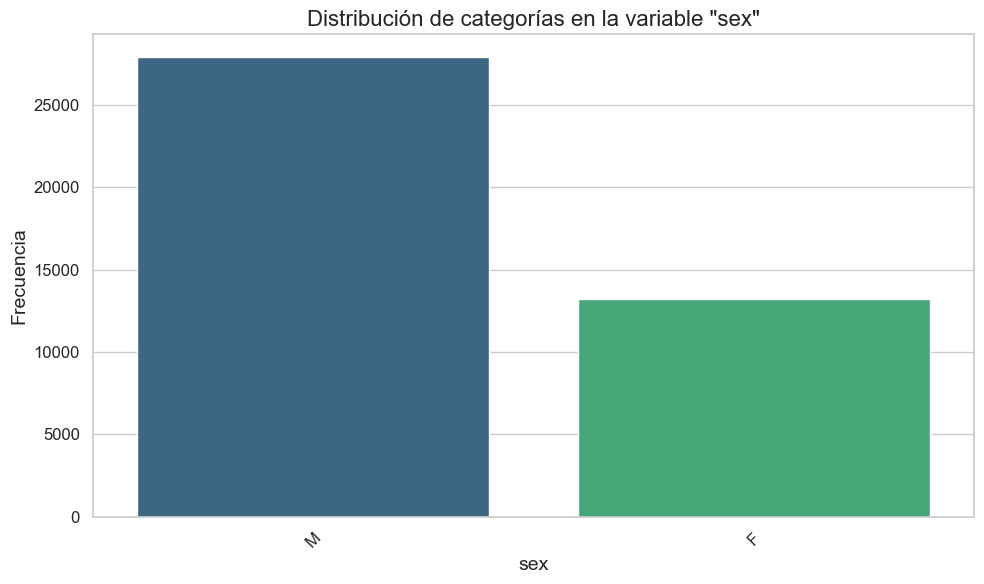

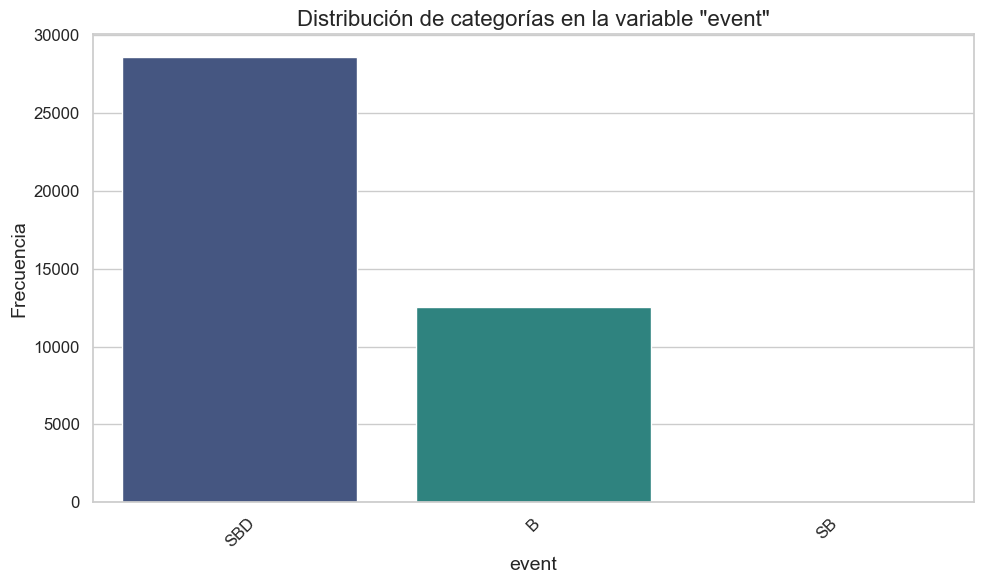

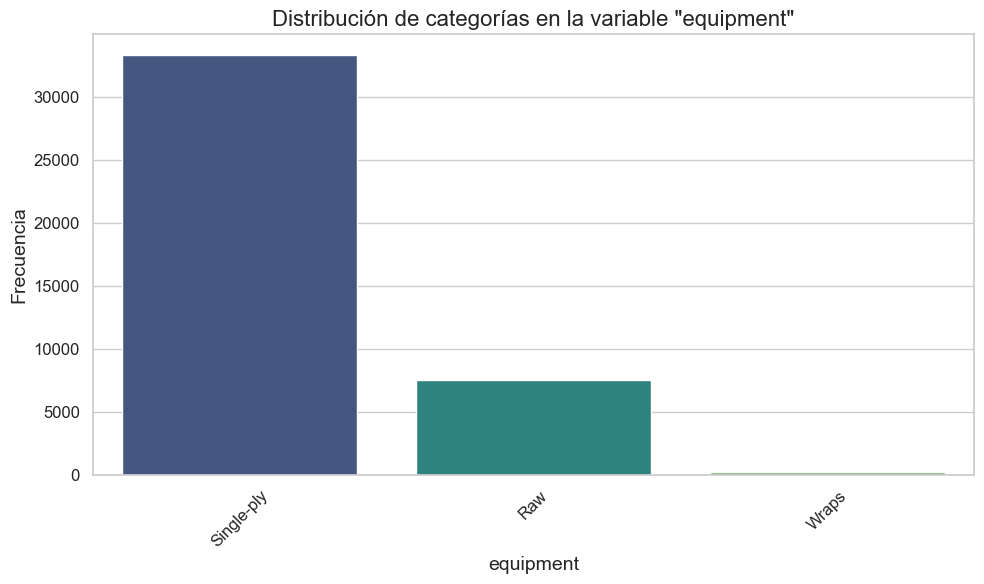

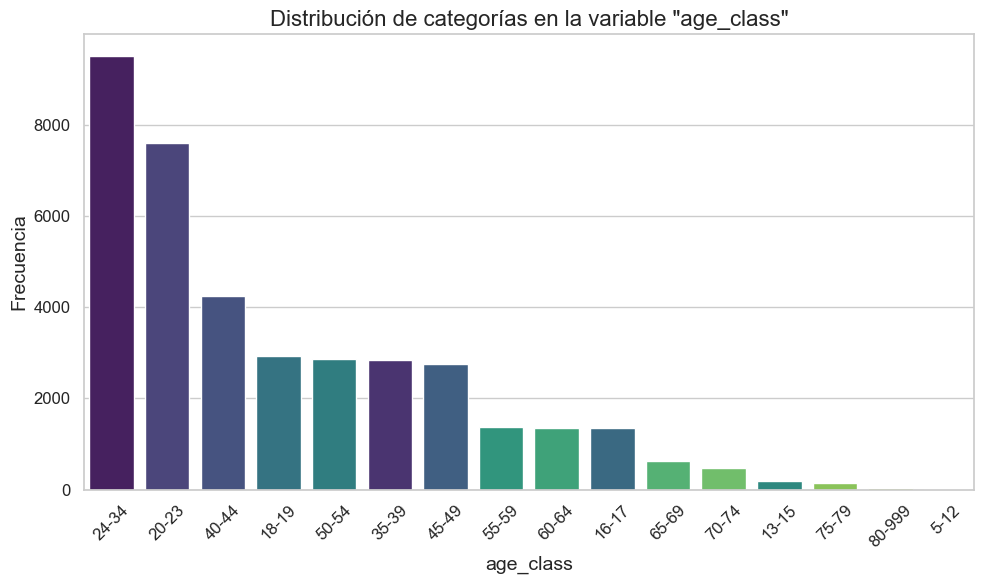

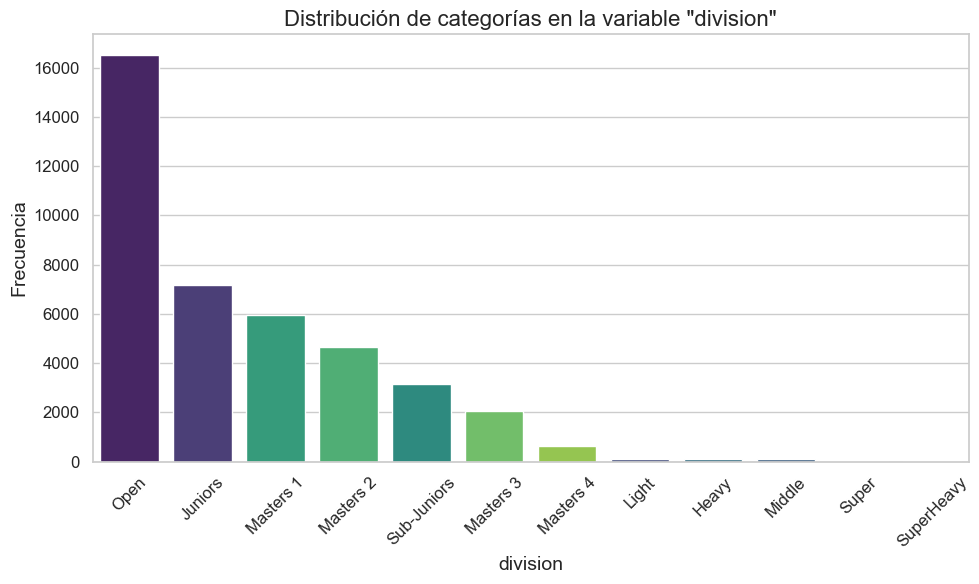

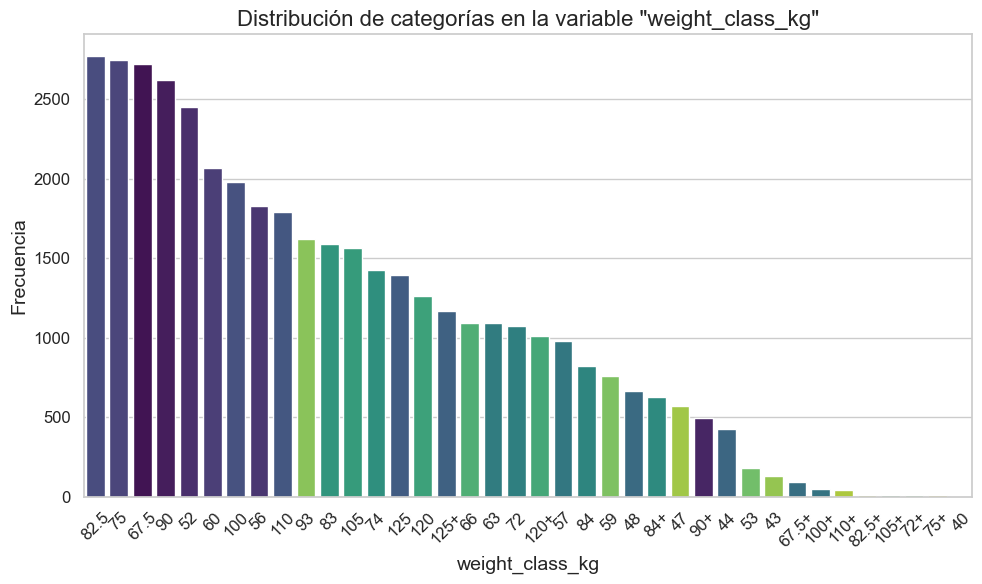

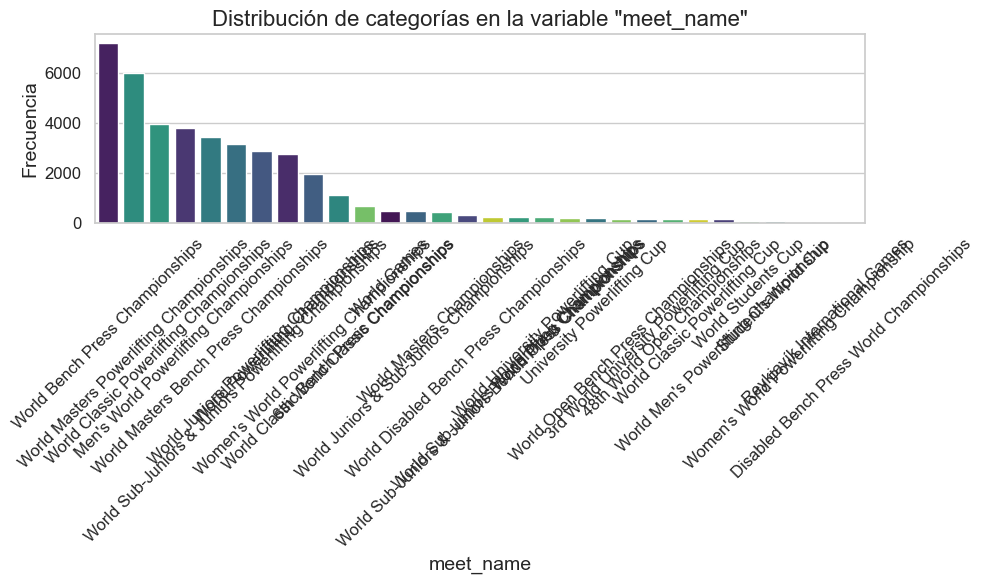

In [932]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

for col in categorical_columns: #b) Gráficos de distribución
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df, hue=col, palette='viridis', order=df[col].value_counts().index, legend=False)
    # Personalizar el gráfico
    plt.title(f'Distribución de categorías en la variable "{col}"', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Frecuencia', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)  # Rotar etiquetas si son largas
    plt.yticks(fontsize=12)
    plt.tight_layout()  # Ajustar el layout para evitar solapamientos
    plt.show()

3. Análisis bivariado (Relación entre variables categóricas)

In [933]:
# a) Tablas de contingencia
# Una tabla de contingencia es una herramienta estadística que se utiliza para resumir y analizar la relación entre dos o más variables categóricas. Muestra la frecuencia o el conteo de las combinaciones de categorías entre las variables. Es especialmente útil para entender cómo se distribuyen las categorías de una variable en función de las categorías de otra.
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:
            print(f"Tabla de contingencia entre {col1} y {col2}:")
            print(pd.crosstab(df[col1], df[col2]))
            print("\n")

Tabla de contingencia entre sex y event:
event     B  SB    SBD
sex                   
F      3921   0   9331
M      8643   2  19255


Tabla de contingencia entre sex y equipment:
equipment   Raw  Single-ply  Wraps
sex                               
F          2904       10348      0
M          4663       22961    276


Tabla de contingencia entre sex y age_class:
age_class  13-15  16-17  18-19  20-23  24-34  35-39  40-44  45-49  5-12  \
sex                                                                       
F            155    687   1152   2606   3311    952   1295    926     1   
M             42    653   1769   4993   6194   1880   2951   1831     0   

age_class  50-54  55-59  60-64  65-69  70-74  75-79  80-999  
sex                                                          
F            765    396    252    132     80     30      12  
M           2105    969   1108    503    383    105      30  


Tabla de contingencia entre sex y division:
division  Heavy  Juniors  Light  Maste

In [934]:
#for col1 in categorical_columns:  # b) Gráficos de barras agrupadas para relacionar las diferentes variables categoricas
#    for col2 in categorical_columns:
#        if col1 != col2:
#            plt.figure(figsize=(12, 6))
#            sns.countplot(x=col1, hue=col2, data=df, palette='viridis')
#            plt.title(f'Relación entre {col1} y {col2}')
#            plt.xlabel(col1)
#            plt.ylabel('Frecuencia')
#            plt.legend(title=col2, bbox_to_anchor=(1.05, 1), loc='upper left')
#            plt.xticks(rotation=45)
#            plt.show()

4. Análisis multivariado (Relación entre variables categóricas y numéricas)

In [935]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns # a) Gráficos de cajas (Box Plot)

#for cat_col in categorical_columns:
#    for num_col in numeric_columns:
#        plt.figure(figsize=(10, 6))
#        sns.boxplot(x=cat_col,y=num_col, data=df, hue=cat_col, palette='viridis', order=df[cat_col].value_counts().index, legend=False)
#        # Personalizar el gráfico
#        plt.title(f'Distribución de {num_col} por {cat_col}', fontsize=16)
#        plt.xlabel(cat_col, fontsize=14)
#        plt.ylabel(num_col, fontsize=14)
#        plt.xticks(rotation=45, fontsize=12)  # Rotar etiquetas si son largas
#        plt.yticks(fontsize=12)
#        plt.tight_layout()  # Ajustar el layout para evitar solapamientos
#        plt.show()



En tu dataset, algunas variables categóricas relevantes podrían ser:

    - Sexo (sex): ¿Hay diferencias en los levantamientos entre hombres y mujeres?

    - División (division): ¿Algunas divisiones tienen mejores resultados que otras?

    - Categoría de peso (weight_class_kg): ¿Los atletas en ciertas categorías de peso tienden a levantar más?

    - Equipo (equipment): ¿El tipo de equipo utilizado afecta los resultados?

In [936]:
# Configurar el estilo de los gráficos (siguiendo recomendaciones de Claus Wilke)
sns.set_theme(style="whitegrid", palette="pastel")  # Usar una paleta suave y no distractiva

# Definir el orden correcto de age_class
ordered_classes = ['5-12', '13-15', '16-17', '18-19', '20-23', '24-34', 
                   '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', 
                   '65-69', '70-74', '75-79', '80-999']

# Función para crear gráficos por variable objetivo
def plot_categorical_vs_target(target_var, df):
    plt.figure(figsize=(10, 20))
    
    # 1. Sexo vs Variable Objetivo
    plt.subplot(4, 1, 1)
    sns.boxplot(x='age_class', y=target_var, hue='age_class', data=df, palette="Set2", legend=False, order=ordered_classes)
    plt.title(f'{target_var} por Rango de Edad', fontsize=14)
    plt.xlabel('Edad', fontsize=12)
    plt.ylabel(target_var, fontsize=12)
    
    # 2. Equipo vs Variable Objetivo
    plt.subplot(4, 1, 2)
    sns.boxplot(x='equipment', y=target_var, hue='equipment', data=df, palette="Set1", legend=False)
    plt.title(f'{target_var} por Equipo', fontsize=14)
    plt.xlabel('Equipo', fontsize=12)
    plt.ylabel(target_var, fontsize=12)
    plt.xticks(rotation=45)

    # 3. Categoría de Peso vs Variable Objetivo
    plt.subplot(4, 1, 3)
    sns.boxplot(x='weight_class_kg', y=target_var, data=df, hue='weight_class_kg', palette="Set3", legend=False)
    plt.title(f'{target_var} por Categoría de Peso', fontsize=14)
    plt.xlabel('Categoría de Peso (kg)', fontsize=12)
    plt.ylabel(target_var, fontsize=12)
    plt.xticks(rotation=45)
    
    # 4. División vs Variable Objetivo
    plt.subplot(4, 1, 4)
    sns.boxplot(x='division', y=target_var, data=df, hue='division', palette="Set2", legend=False)
    plt.title(f'{target_var} por División', fontsize=14)
    plt.xlabel('División', fontsize=12)
    plt.ylabel(target_var, fontsize=12)
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()


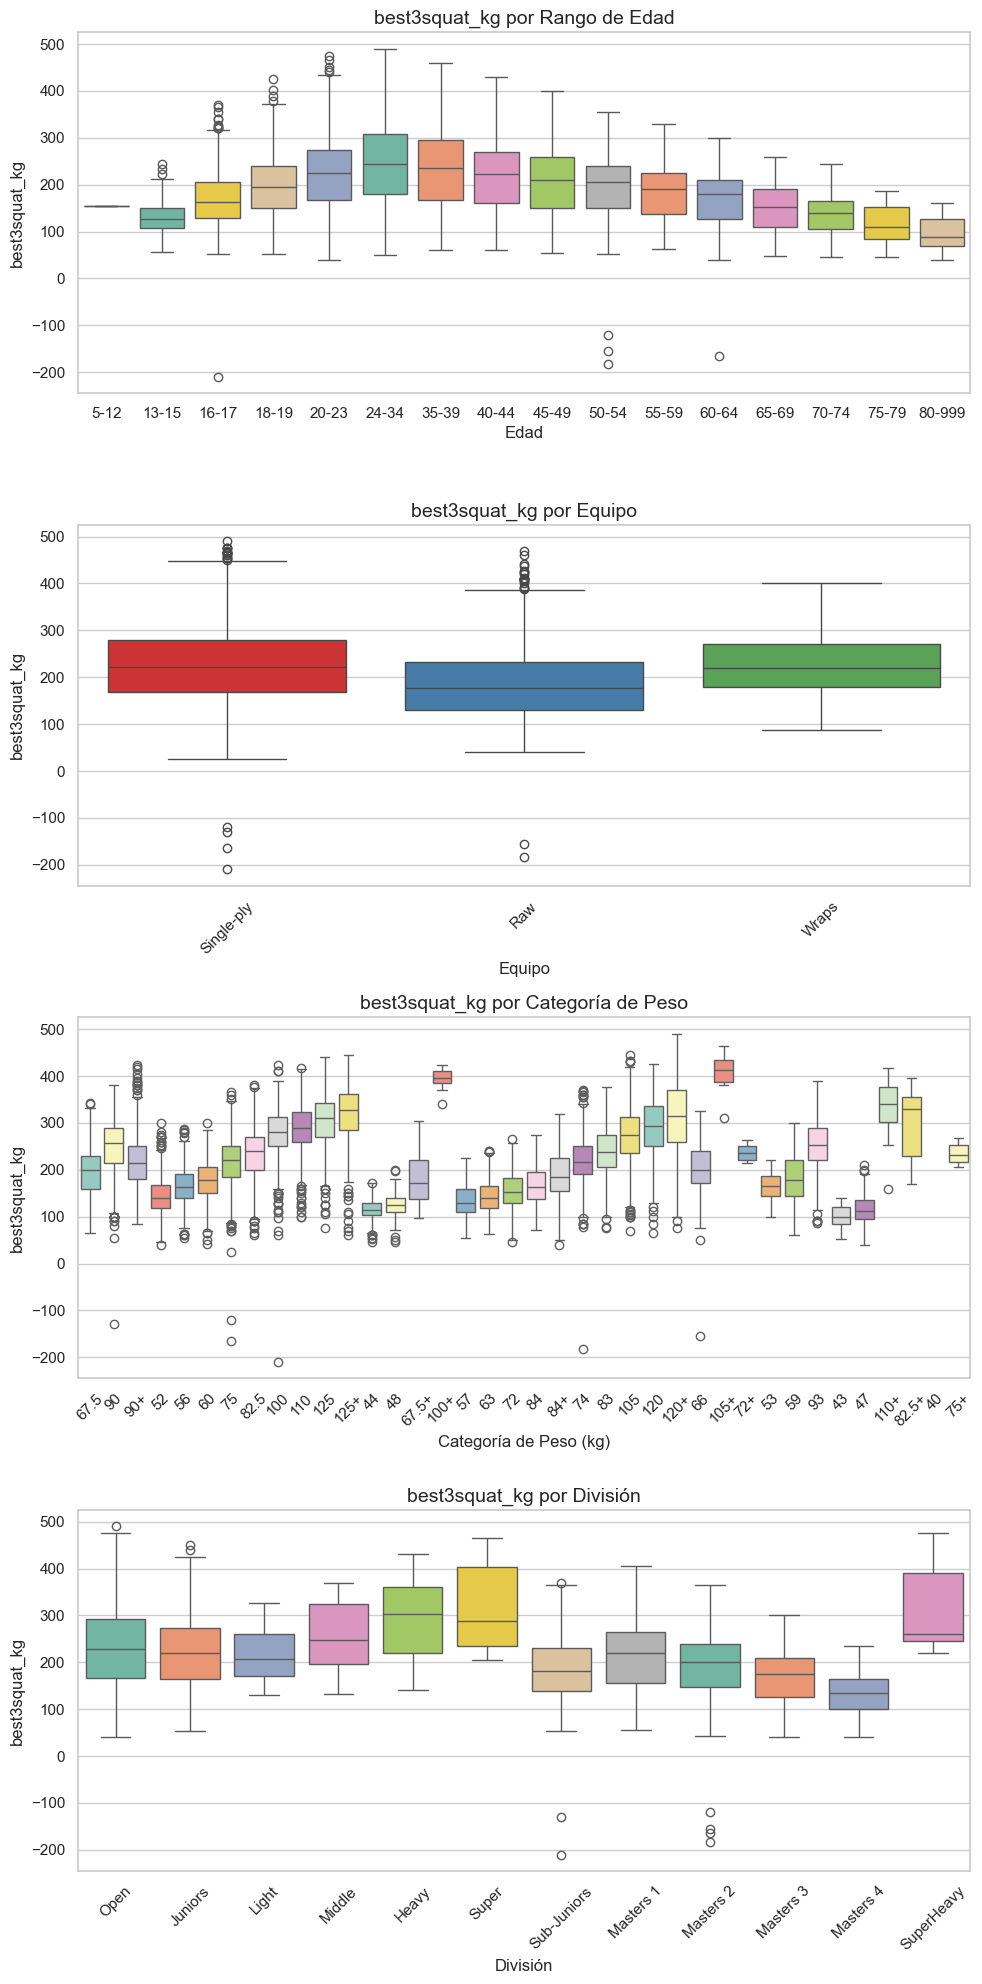

In [937]:

# Gráficos para best3squat_kg
plot_categorical_vs_target('best3squat_kg', df)


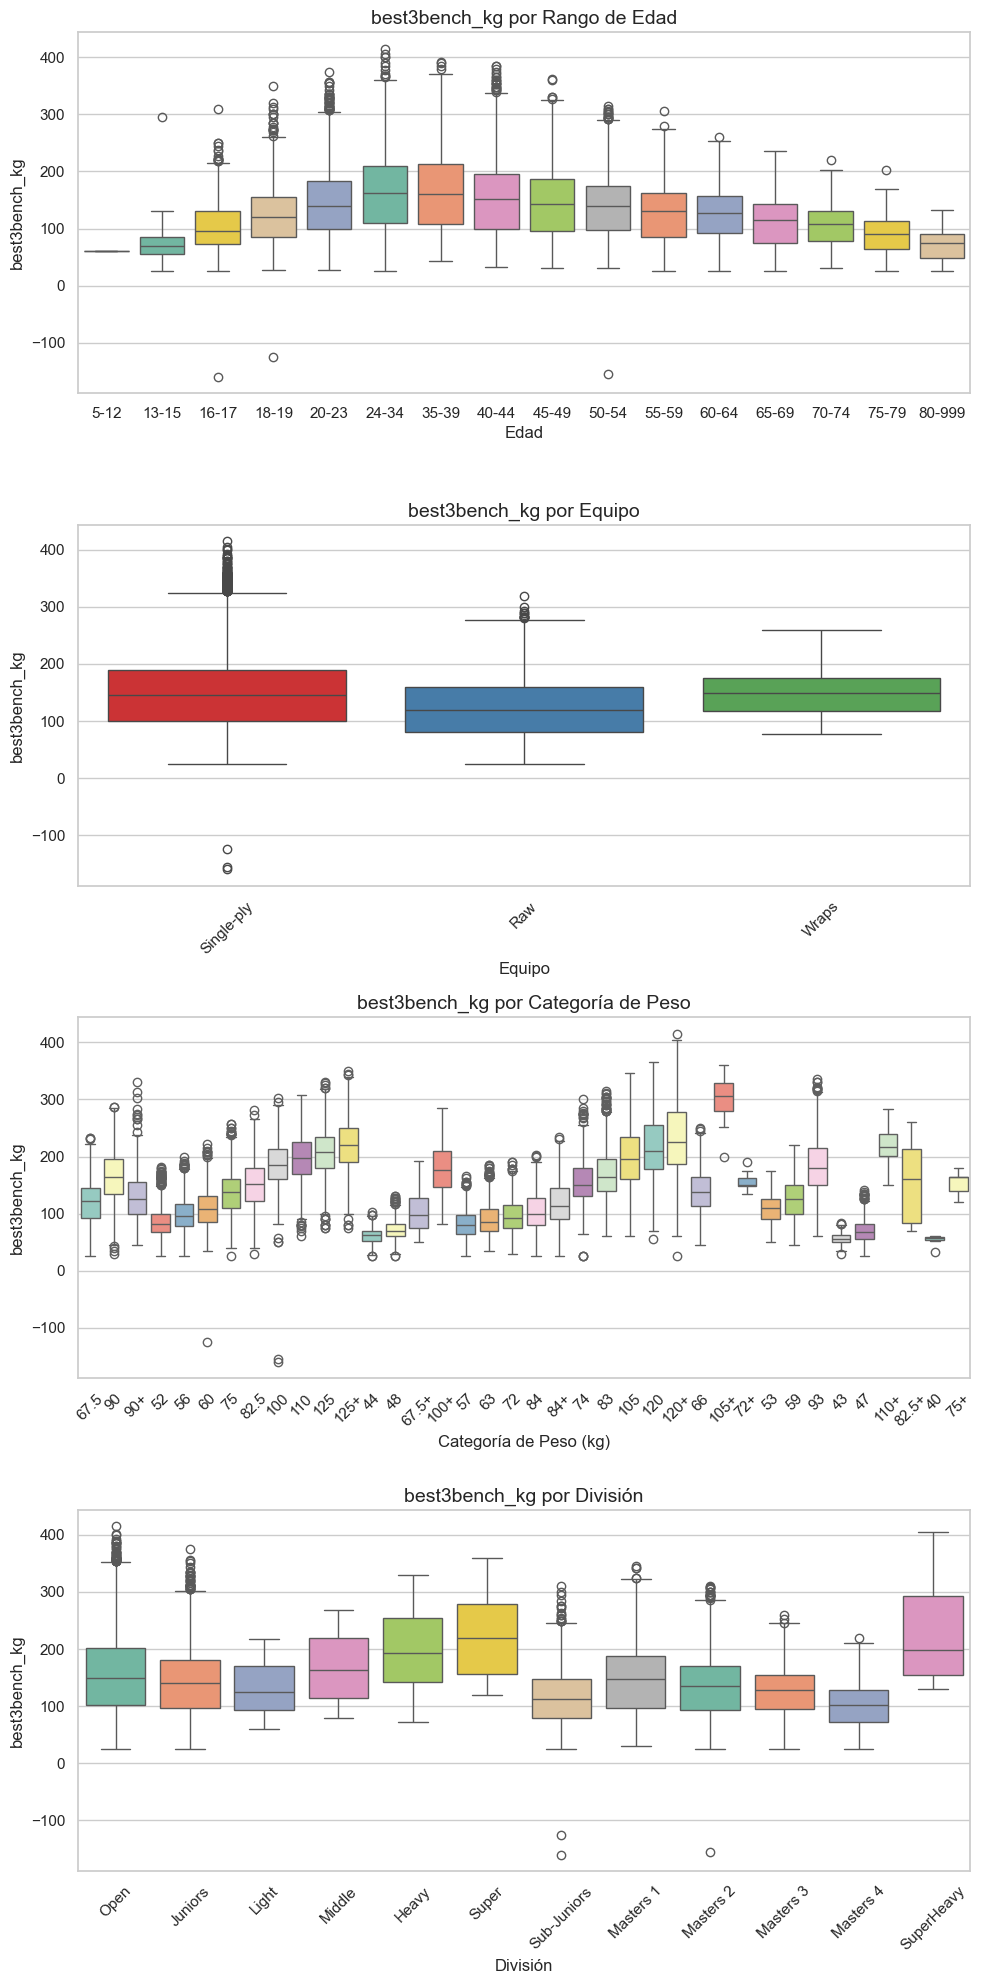

In [938]:

# Gráficos para best3bench_kg
plot_categorical_vs_target('best3bench_kg', df)


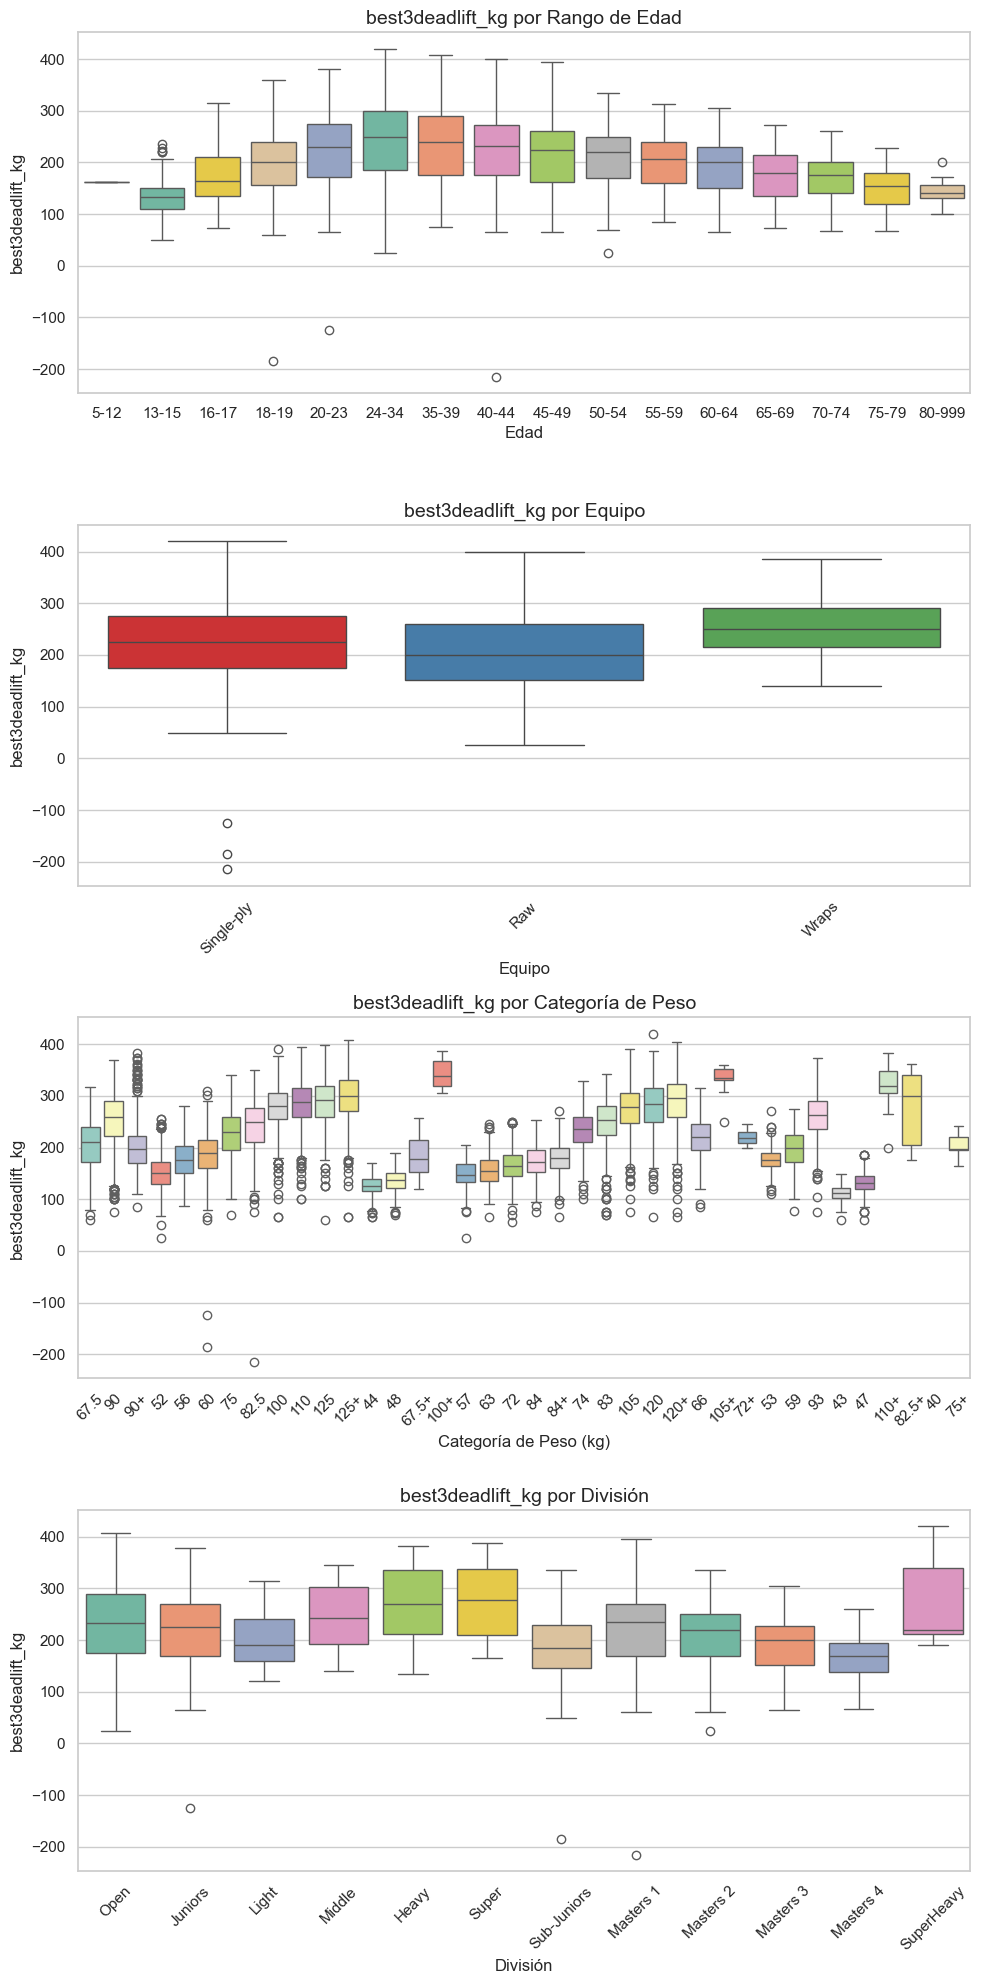

In [939]:

# Gráficos para best3deadlift_kg
plot_categorical_vs_target('best3deadlift_kg', df)

Visualizacion Variables numéricas

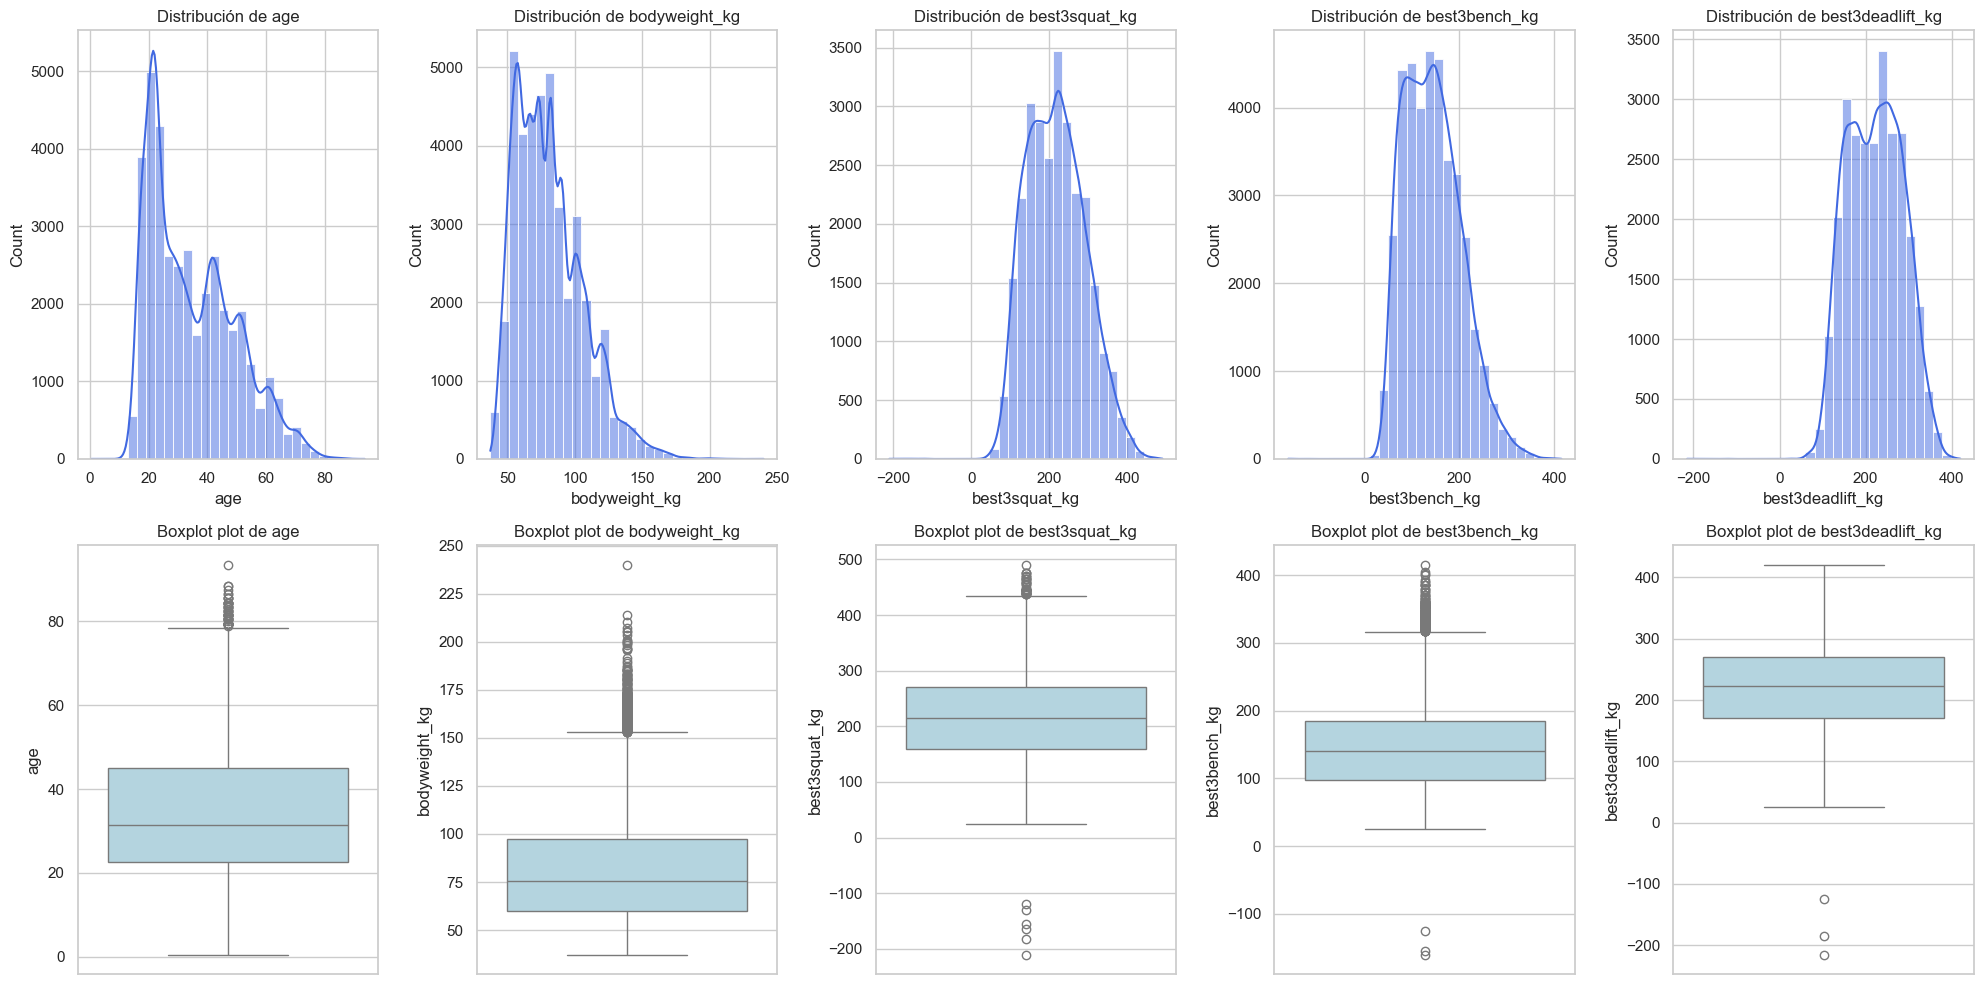

In [940]:
# Configuración del estilo
sns.set_theme(style="whitegrid")

# Seleccionar solo las columnas numéricas
numeric_cols = ["age", "bodyweight_kg", "best3squat_kg", "best3bench_kg", "best3deadlift_kg"]

# Crear el tamaño de la figura
fig, axes = plt.subplots(nrows=2, ncols=len(numeric_cols), figsize=(len(numeric_cols)*4, 10))

# Graficar histogramas con KDE
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes[0, i], bins=30, color='royalblue')
    axes[0, i].set_title(f"Distribución de {col}")
    
# Graficar violin plots
for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df[col], ax=axes[1, i], color='lightblue')
    axes[1, i].set_title(f"Boxplot plot de {col}")

#plt.title(f'Distribución de datos númericos', fontsize=16)
#plt.xlabel(cat_col, fontsize=14)
#plt.ylabel(num_col, fontsize=14)
plt.tight_layout()
plt.show()


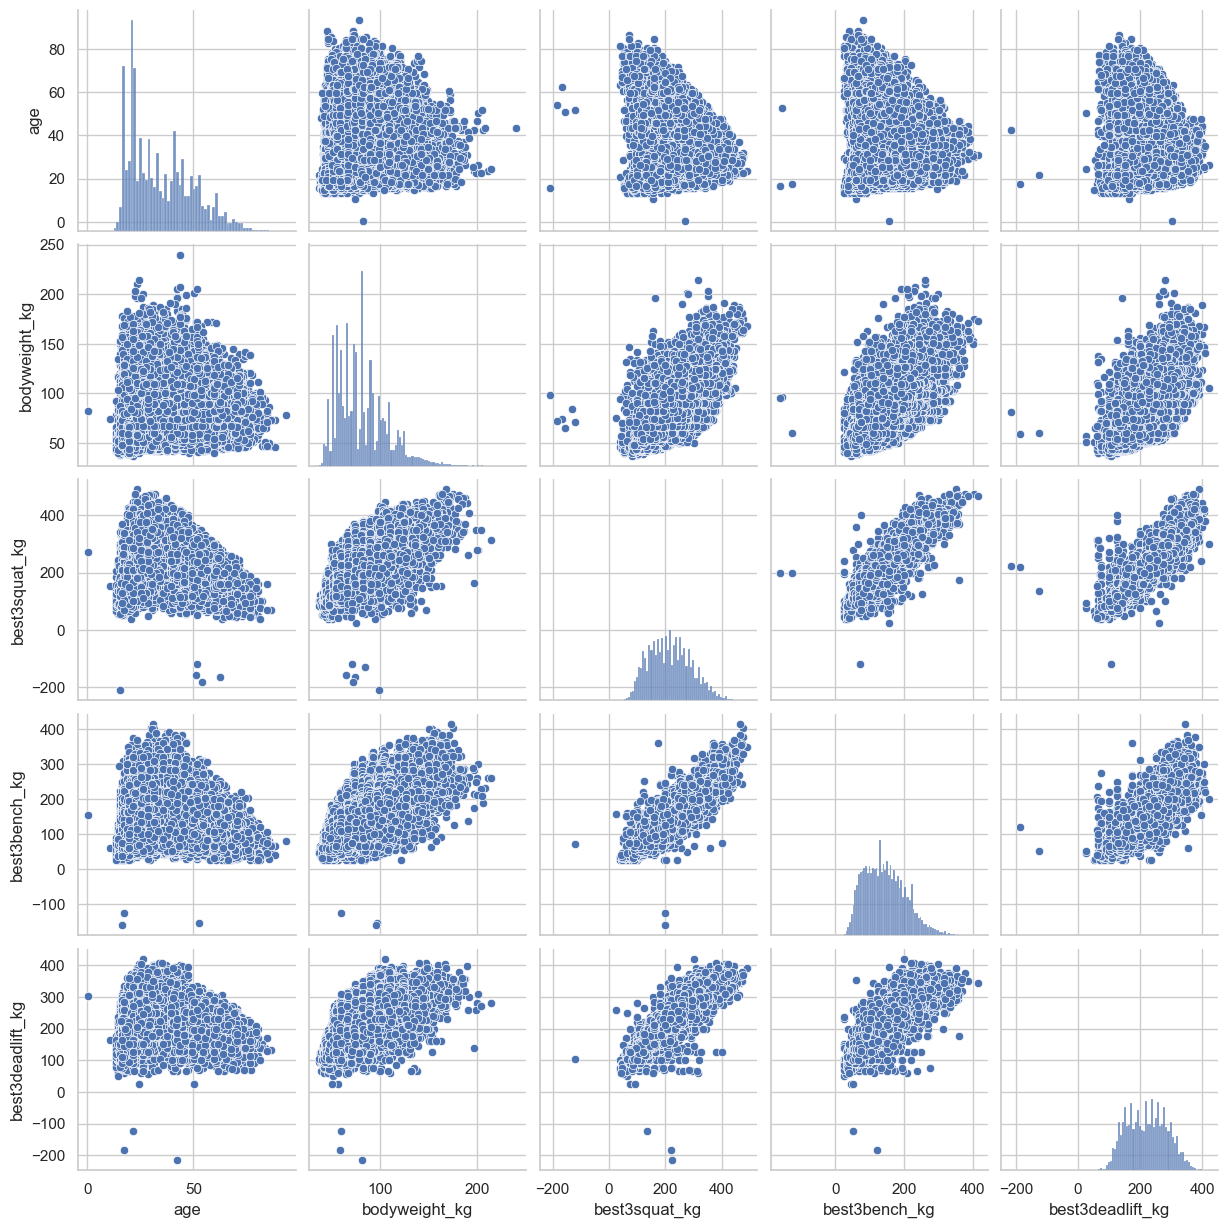

In [941]:
sns.pairplot(df)

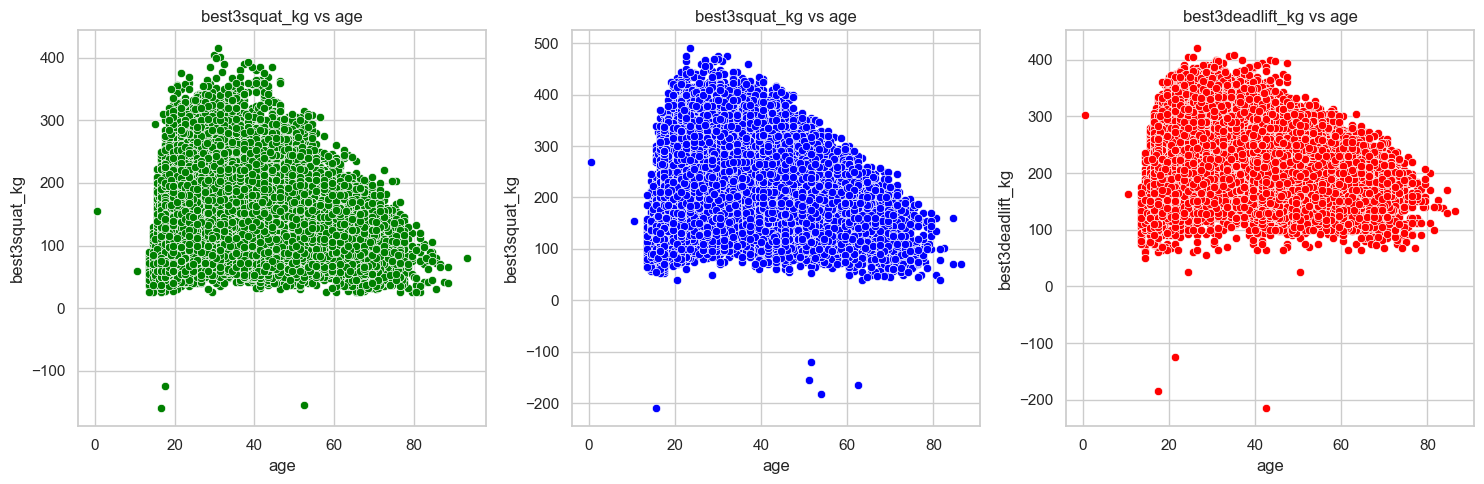

In [942]:
# 4. Relación entre las variables objetivo y la edad (age)
# Configurar el estilo de los gráficos
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12

plt.figure(figsize=(15, 5))

# best3squat_kg vs age
plt.subplot(1, 3, 1)
sns.scatterplot(x=df['age'], y=df['best3bench_kg'], color='green')
plt.title('best3squat_kg vs age')
plt.xlabel('age')
plt.ylabel('best3squat_kg')

# best3squat_kg vs age
plt.subplot(1, 3, 2)
sns.scatterplot(x=df['age'], y=df['best3squat_kg'], color='blue')
plt.title('best3squat_kg vs age')
plt.xlabel('age')
plt.ylabel('best3squat_kg')

# best3deadlift_kg vs age
plt.subplot(1, 3, 3)
sns.scatterplot(x=df['age'], y=df['best3deadlift_kg'], color='red')
plt.title('best3deadlift_kg vs age')
plt.xlabel('age')
plt.ylabel('best3deadlift_kg')

plt.tight_layout()
plt.show()

## Análisis de las distribuciones en el dataset

A partir de los histogramas con KDE y los box plots, podemos hacer varias observaciones:

- Distribución de la edad (age):
        Presenta una distribución multimodal con picos notables alrededor de los 20-30 años y otro en los 40-50 años.
        Hay una fuerte concentración en edades más jóvenes.
        Existen valores atípicos en edades mayores (posiblemente errores en los datos o participantes fuera del rango común).

- Distribución del peso corporal (bodyweight_kg):
        Tiene una distribución sesgada a la derecha (cola larga hacia valores altos).
        La mayoría de los atletas pesa entre 50 y 100 kg.
        Hay valores extremos por encima de 150 kg, lo que podría ser atribuible a categorías de peso más altas o errores en los datos.

- Distribución de levantamientos (best3squat_kg, best3bench_kg, best3deadlift_kg):
        Estas variables siguen una distribución aproximadamente normal, pero con colas largas.
        El best3squat_kg y best3deadlift_kg parecen seguir un patrón similar, con la mayoría de los levantamientos en el rango de 100-250 kg.
        Existen valores negativos en los box plots, lo que puede indicar errores en la base de datos.

- Valores atípicos y posibles errores:
        En los box plots, los valores negativos en best3squat_kg, best3bench_kg y best3deadlift_kg son inusuales. Es probable que se trate de errores de entrada o codificación incorrecta.
        La variable age muestra algunos valores extremos que deberían verificarse.

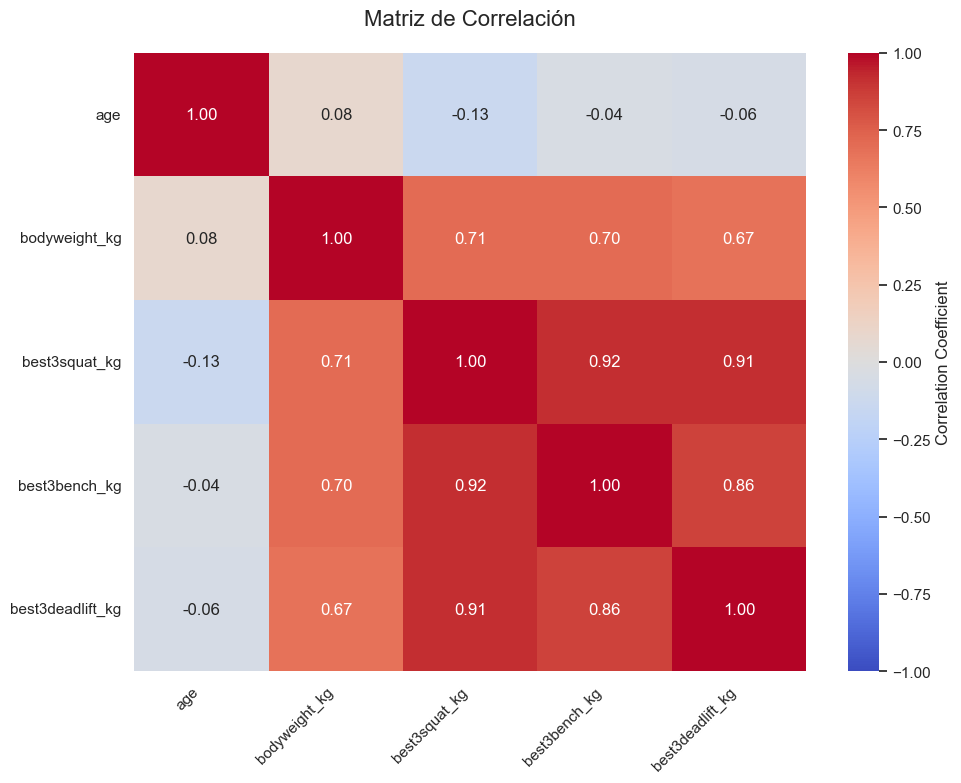

In [943]:
numeric_data = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', 
            cbar_kws={'label': 'Correlation Coefficient'}, vmin=-1, vmax=1)
plt.title("Matriz de Correlación", pad=20, fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

LIMPIEZA DE DATOS

In [944]:
# Limpieza de datos
# Convertir la columna 'date' a tipo datetime
df['date'] = pd.to_datetime(df['date'])
# Ordenar los datos por fecha
df = df.sort_values(by='date')

In [945]:
#datos errones decidi eliminarlos
df = df[(df['age'] >= 5) | df['age'].isna()] # existen un participante con edad 0.5 años

In [946]:
#df[df['age']>=80]  # datos de las edades >=80 son correctos. World Bench Press Championships Svend Stensgaard es el power lifter mas viejo de la historia con 93 años

In [947]:
#df[df['bodyweight_kg']>=200]# datos del peso son todos correctos 

In [948]:
# Eliminación de outliers (dato erroneo) sin eliminar valores nulos
df = df[(df['best3squat_kg'] >= 0) | df['best3squat_kg'].isna()]
df = df[(df['best3bench_kg'] >= 0) | df['best3bench_kg'].isna()]
df = df[(df['best3deadlift_kg'] >= 0) | df['best3deadlift_kg'].isna()]

Los valores NaN en best3bench_kg pueden deberse a varias razones, como la no participación en el levantamiento de banca, errores en la recolección de datos o eventos que no incluyen este levantamiento. Dependiendo de tu análisis, puedes eliminarlos, imputarlos o tratarlos como una categoría especial.

In [949]:
# Eliminación de valores faltantes menores al 5% de los datos
df = df.dropna(subset=['weight_class_kg'])
df = df.dropna(subset=['division'])
df = df.dropna(subset=['bodyweight_kg'])

In [950]:
df.isna().sum()

name                    0
sex                     0
event                   0
equipment               0
age                  2683
age_class            2660
division                0
bodyweight_kg           0
weight_class_kg         0
best3squat_kg       13365
best3bench_kg        2419
best3deadlift_kg    13673
place                   0
date                    0
federation              0
meet_name               0
dtype: int64

In [951]:
# Porcentaje de valores nulos para cada columna
porcentaje_nulos = df.isnull().mean() * 100
print(round(porcentaje_nulos, 2))

name                 0.00
sex                  0.00
event                0.00
equipment            0.00
age                  6.65
age_class            6.59
division             0.00
bodyweight_kg        0.00
weight_class_kg      0.00
best3squat_kg       33.13
best3bench_kg        6.00
best3deadlift_kg    33.90
place                0.00
date                 0.00
federation           0.00
meet_name            0.00
dtype: float64


In [952]:
df[df['weight_class_kg']=='40']

,name,sex,event,equipment,age,age_class,division,bodyweight_kg,weight_class_kg,best3squat_kg,best3bench_kg,best3deadlift_kg,place,date,federation,meet_name
35281,Hsiu-Ju Cheng,F,B,Raw,14.5,13-15,Open,40.0,40,NaN,57.5,NaN,1,1997-12-05,IPF,World Disabled Bench Press Championships
34696,Lisa Tuckey,F,B,Raw,21.5,20-23,Open,40.0,40,NaN,52.5,NaN,2,1998-12-11,IPF,World Disabled Bench Press Championships
34695,Chen-Yen Huang,F,B,Raw,24.5,24-34,Open,40.0,40,NaN,57.5,NaN,1,1998-12-11,IPF,World Disabled Bench Press Championships
36474,Chen-Yen Huang,F,B,Raw,18.5,18-19,Open,40.0,40,NaN,60.0,NaN,1,1999-12-09,IPF,World Disabled Bench Press Championships
40706,Chen-Yen Huang,F,B,Raw,19.5,20-23,Open,40.0,40,NaN,60.0,NaN,1,2000-12-08,IPF,World Disabled Bench Press Championships
40707,Elvira Kosareva,F,B,Raw,59.5,55-59,Open,40.0,40,NaN,32.5,NaN,1,2000-12-08,IPF,World Disabled Bench Press Championships


La imputación por grupos es especialmente recomendable cuando:

 - La distribución de los datos es multimodal.
 - Los datos faltantes están relacionados con subgrupos o categorías.
 - Quieres preservar la estructura natural de los datos.

In [953]:
# valores faltantes AGE 
#df['age'] = df['age'].fillna(df['age'].mean())

# imputacion por grupos debido a la distribucion multimodal de la caracteristica
# Agrupar por las columnas dividen los datos.
group_columns = ['sex', 'division']

# Calcular la mediana de 'age' por cada grupo
age_median_by_group = df.groupby(group_columns)['age'].median()

# Calcular la mediana global de 'age' en caso de que falten algunas combinaciones
global_median = df['age'].median()

# Función para imputar el valor de 'age' por grupo
def impute_age(row, median_by_group, global_median):
    try:
        # Si 'age' está vacío, reemplazar con la mediana del grupo correspondiente
        return median_by_group.loc[row[group_columns]].item()
    except KeyError:
        # Si el grupo no existe, devolver la mediana global
        return global_median if pd.isna(row['age']) else row['age']

# Aplicar la imputación por grupos
df['age'] = df.apply(impute_age, axis=1, median_by_group=age_median_by_group, global_median=global_median)


In [954]:
#valores faltantes de age-clas

# Obtener los valores únicos en 'age_class'
unique_age_classes = df['age_class'].dropna().unique()

# Ver los valores únicos para tener una idea de cómo clasificarlos
print(f"Valores únicos de 'age_class': {unique_age_classes}")

# Definir una función para asignar 'age_class' basado en los valores de 'age'
def categorize_age_based_on_class(age, unique_classes):
    # Asignamos un rango para cada clase única de 'age_class'
    if '5-12' in unique_classes and 5 <= age <= 12:
        return '5-12'
    elif '13-15' in unique_classes and 13 <= age <= 15:
        return '13-15'
    elif '16-17' in unique_classes and 16 <= age <= 17:
        return '16-17'
    elif '18-19' in unique_classes and 18 <= age <= 19:
        return '18-19'
    elif '20-23' in unique_classes and 20 <= age <= 23:
        return '20-23'
    elif '24-34' in unique_classes and 24 <= age <= 34:
        return '24-34'
    elif '35-39' in unique_classes and 35 <= age <= 39:
        return '35-39'
    elif '40-44' in unique_classes and 40 <= age <= 44:
        return '40-44'
    elif '45-49' in unique_classes and 45 <= age <= 49:
        return '45-49'
    elif '50-54' in unique_classes and 50 <= age <= 54:
        return '50-54'
    elif '55-59' in unique_classes and 55 <= age <= 59:
        return '55-59'
    elif '60-64' in unique_classes and 60 <= age <= 64:
        return '60-64'
    elif '65-69' in unique_classes and 65 <= age <= 69:
        return '65-69'
    elif '70-74' in unique_classes and 70 <= age <= 74:
        return '70-74'
    elif '75-79' in unique_classes and 75 <= age <= 79:
        return '75-79'
    elif '80-999' in unique_classes and age >= 80:
        return '80-999'
    else:
        return 'Unknown'  # Si no coincide con las clases, devolver 'Unknown'

# Aplicar la función para rellenar los NaN en 'age_class'
df['age_class'] = df.apply(
    lambda row: categorize_age_based_on_class(row['age'], unique_age_classes) if pd.isnull(row['age_class']) else row['age_class'], 
    axis=1
)

Valores únicos de 'age_class': ['24-34' '40-44' '35-39' '16-17' '18-19' '45-49' '50-54' '20-23' '13-15'
 '55-59' '70-74' '60-64' '65-69' '75-79' '80-999' '5-12']


In [955]:
# valores faltantes best3bench_kg alrededor del 6% de los datos
#df['best3bench_kg'] = df['best3bench_kg'].fillna(df['best3bench_kg'].median())
# Imputar por grupo (por weight_class_kg)
group_medians = df.groupby('weight_class_kg')['best3bench_kg'].transform('median')
df['best3bench_kg'] = df['best3bench_kg'].fillna(group_medians)


In [956]:
# valores faltantes best3squat_kg
# Imputación por grupos para best3squat_kg
group_medians_squat = df.groupby('weight_class_kg')['best3squat_kg'].transform('median')
df['best3squat_kg'] = df['best3squat_kg'].fillna(group_medians_squat)

# Imputación por grupos para best3deadlift_kg
group_medians_deadlift = df.groupby('weight_class_kg')['best3deadlift_kg'].transform('median')
df['best3deadlift_kg'] = df['best3deadlift_kg'].fillna(group_medians_deadlift)

In [957]:
# valores faltantes best3deadlift_kg 

from sklearn.impute import KNNImputer

# Seleccionar las columnas relevantes para la imputación
columns_to_impute = ['best3squat_kg', 'best3deadlift_kg']
numeric_data = df[['bodyweight_kg', 'age'] + columns_to_impute]  # Incluye variables auxiliares

# Crear una máscara para identificar los valores faltantes
missing_mask = df[columns_to_impute].isna()

# Aplicar KNNImputer
imputer = KNNImputer(n_neighbors=1)
df_imputed = pd.DataFrame(imputer.fit_transform(numeric_data), columns=numeric_data.columns, index=df.index)

# Reemplazar solo los valores faltantes en el DataFrame original
for col in columns_to_impute:
    df.loc[missing_mask[col], col] = df_imputed.loc[missing_mask[col], col]

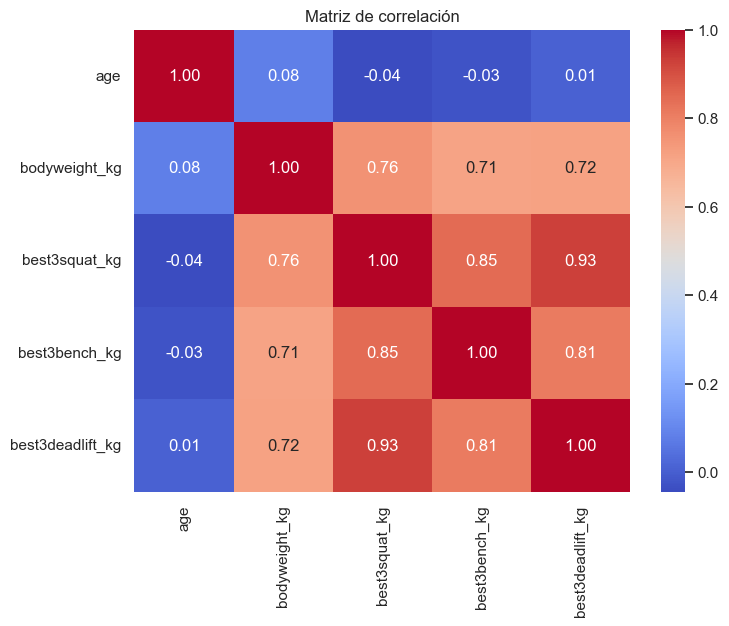

In [958]:
numeric_data = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()  # o numeric_data_filled.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de correlación")
plt.show()

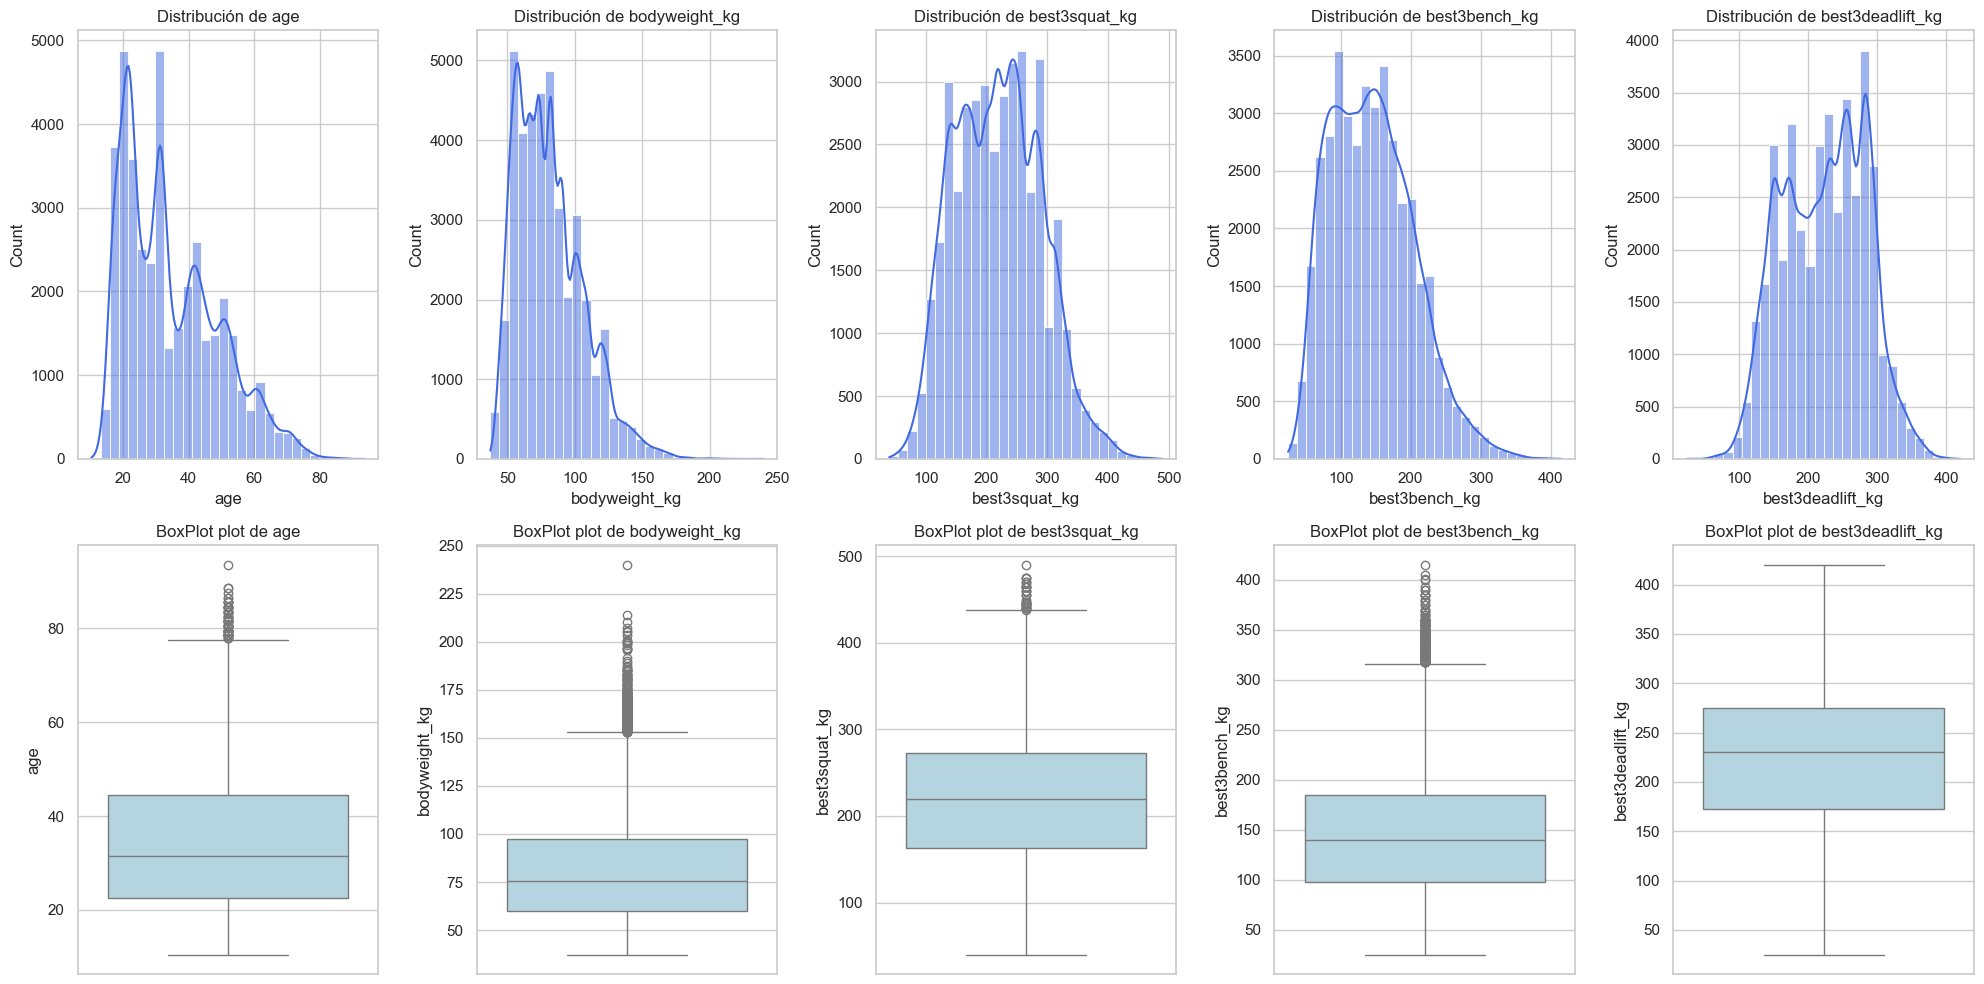

In [959]:
# Configuración del estilo
sns.set_theme(style="whitegrid")

# Seleccionar solo las columnas numéricas
numeric_cols = ["age", "bodyweight_kg", "best3squat_kg", "best3bench_kg", "best3deadlift_kg"]

# Crear el tamaño de la figura
fig, axes = plt.subplots(nrows=2, ncols=len(numeric_cols), figsize=(len(numeric_cols)*4, 10))

# Graficar histogramas con KDE
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes[0, i], bins=30, color='royalblue')
    axes[0, i].set_title(f"Distribución de {col}")
    
# Graficar Boxplot plots
for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df[col], ax=axes[1, i], color='lightblue')
    axes[1, i].set_title(f"BoxPlot plot de {col}")

plt.tight_layout()
plt.show()

MACHINE LEARNING

In [960]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40338 entries, 39704 to 38483
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              40338 non-null  object        
 1   sex               40338 non-null  object        
 2   event             40338 non-null  object        
 3   equipment         40338 non-null  object        
 4   age               40338 non-null  float64       
 5   age_class         40338 non-null  object        
 6   division          40338 non-null  object        
 7   bodyweight_kg     40338 non-null  float64       
 8   weight_class_kg   40338 non-null  object        
 9   best3squat_kg     40338 non-null  float64       
 10  best3bench_kg     40338 non-null  float64       
 11  best3deadlift_kg  40338 non-null  float64       
 12  place             40338 non-null  object        
 13  date              40338 non-null  datetime64[ns]
 14  federation        40338

Resumen de encoding por columna

Columna	Tipo de Encoding	Razón

sex	One Hot Encoding	2 categorías sin orden lógico.

event	One Hot Encoding	3 categorías sin orden lógico.

equipment	One Hot Encoding	3 categorías sin orden lógico.

age_class	Label Encoding	16 categorías con orden lógico.

division	One Hot Encoding	12 categorías sin orden lógico.

weight_class_kg	Label Encoding	37 categorías con orden lógico.

place	Label Encoding	34 categorías con orden lógico.

federation	no se toma en cuenta

meet_name	no se toma en cuenta, ppor ser el nombre de la competicion.


In [961]:
# Codificación de variables categóricas
label_encode_columns = ['age_class','weight_class_kg', 'place']
one_hot_encode_columns = ['sex', 'event', 'equipment', 'division']

# Aplicar Label Encoding
label_encoder = LabelEncoder()
for col in label_encode_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Aplicar One Hot Encoding
df = pd.get_dummies(df, columns=one_hot_encode_columns, drop_first=True)

# Seleccionar variables independientes (X) y dependientes (y)
X = df.drop(columns=['best3squat_kg', 'best3bench_kg', 'best3deadlift_kg', 'name', 'date','federation', 'meet_name'])
y_squat = df['best3squat_kg']
y_bench = df['best3bench_kg']
y_deadlift = df['best3deadlift_kg']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_squat_train, y_squat_test = train_test_split(X, y_squat, test_size=0.2, random_state=42)
_, _, y_bench_train, y_bench_test = train_test_split(X, y_bench, test_size=0.2, random_state=42)
_, _, y_deadlift_train, y_deadlift_test = train_test_split(X, y_deadlift, test_size=0.2, random_state=42)


PREDICCIONES

In [962]:

# Escalar las características (importante para SVR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Modelos a evaluar
models = {
    "Linear Regression": LinearRegression(),
    "Support Vector Regression": SVR(kernel='rbf'),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# Evaluar modelos para best3squat_kg
print("Resultados para best3squat_kg:")
for model_name, model in models.items():
    rmse, r2 = evaluate_model(model, X_train_scaled, X_test_scaled, y_squat_train, y_squat_test)
    print(f"{model_name}: RMSE = {rmse:.2f}, R² = {r2:.2f}")

# Evaluar modelos para best3bench_kg
print("\nResultados para best3bench_kg:")
for model_name, model in models.items():
    rmse, r2 = evaluate_model(model, X_train_scaled, X_test_scaled, y_bench_train, y_bench_test)
    print(f"{model_name}: RMSE = {rmse:.2f}, R² = {r2:.2f}")

# Evaluar modelos para best3deadlift_kg
print("\nResultados para best3deadlift_kg:")
for model_name, model in models.items():
    rmse, r2 = evaluate_model(model, X_train_scaled, X_test_scaled, y_deadlift_train, y_deadlift_test)
    print(f"{model_name}: RMSE = {rmse:.2f}, R² = {r2:.2f}")

Resultados para best3squat_kg:
Linear Regression: RMSE = 33.83, R² = 0.76
Support Vector Regression: RMSE = 30.30, R² = 0.81
Random Forest: RMSE = 22.57, R² = 0.89

Resultados para best3bench_kg:
Linear Regression: RMSE = 29.39, R² = 0.75
Support Vector Regression: RMSE = 27.76, R² = 0.78
Random Forest: RMSE = 21.63, R² = 0.87

Resultados para best3deadlift_kg:
Linear Regression: RMSE = 30.26, R² = 0.74
Support Vector Regression: RMSE = 26.80, R² = 0.80
Random Forest: RMSE = 20.64, R² = 0.88


In [963]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40338 entries, 39704 to 38483
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   name                  40338 non-null  object        
 1   age                   40338 non-null  float64       
 2   age_class             40338 non-null  int32         
 3   bodyweight_kg         40338 non-null  float64       
 4   weight_class_kg       40338 non-null  int32         
 5   best3squat_kg         40338 non-null  float64       
 6   best3bench_kg         40338 non-null  float64       
 7   best3deadlift_kg      40338 non-null  float64       
 8   place                 40338 non-null  int32         
 9   date                  40338 non-null  datetime64[ns]
 10  federation            40338 non-null  object        
 11  meet_name             40338 non-null  object        
 12  sex_M                 40338 non-null  bool          
 13  event_SB         

Conclusiones

    Rendimiento general:

        Random Forest es el modelo con mejor rendimiento en todos los casos, con un RMSE más bajo y un R² más alto en comparación con los otros dos modelos.

        Multiple Linear Regression y SVR tienen un rendimiento similar, con valores de RMSE y R² muy cercanos entre sí.

    Precisión de las predicciones:

        Random Forest tiene un RMSE significativamente más bajo que los otros modelos, lo que indica que sus predicciones están más cerca de los valores reales.

        Multiple Linear Regression y SVR tienen un RMSE más alto, lo que sugiere que sus predicciones son menos precisas.

    Explicabilidad de la varianza:

        Random Forest explica una mayor proporción de la varianza en los datos (R² más alto), lo que indica que captura mejor las relaciones entre las variables independientes y los targets.

        Multiple Linear Regression y SVR tienen un R² más bajo, lo que sugiere que no capturan completamente las relaciones en los datos.

    Consistencia entre targets:

        El rendimiento relativo de los modelos es consistente para los tres targets (best3squat_kg, best3bench_kg, best3deadlift_kg), lo que indica que las conclusiones son robustas.

Visualizaciones

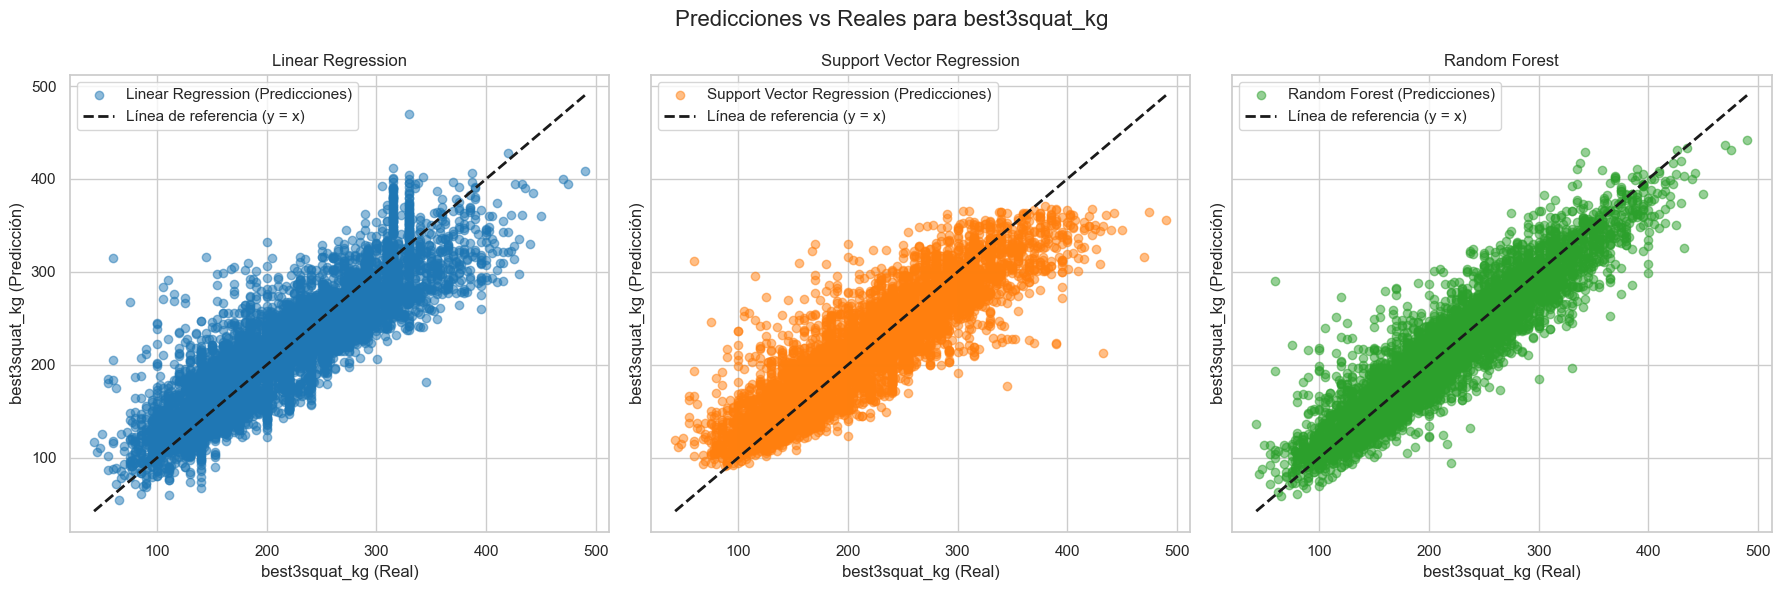

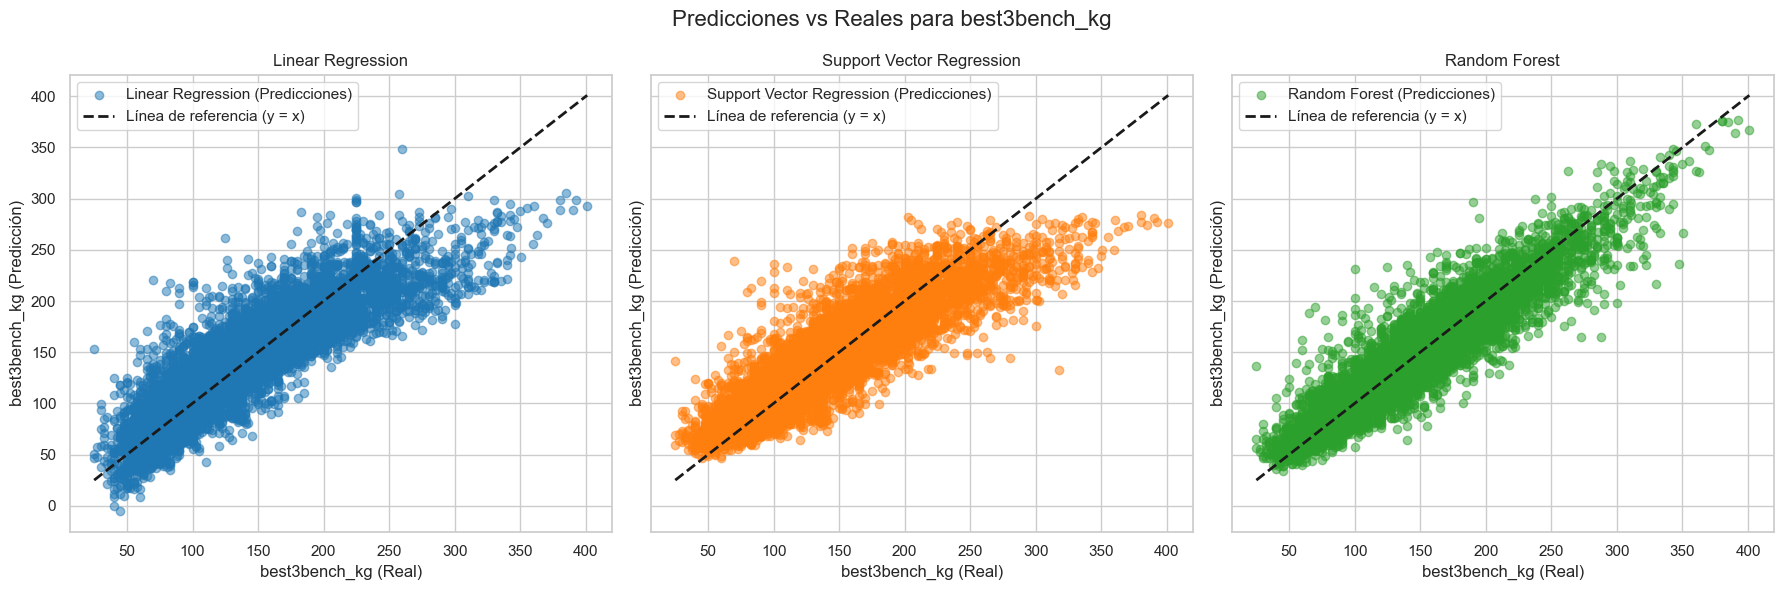

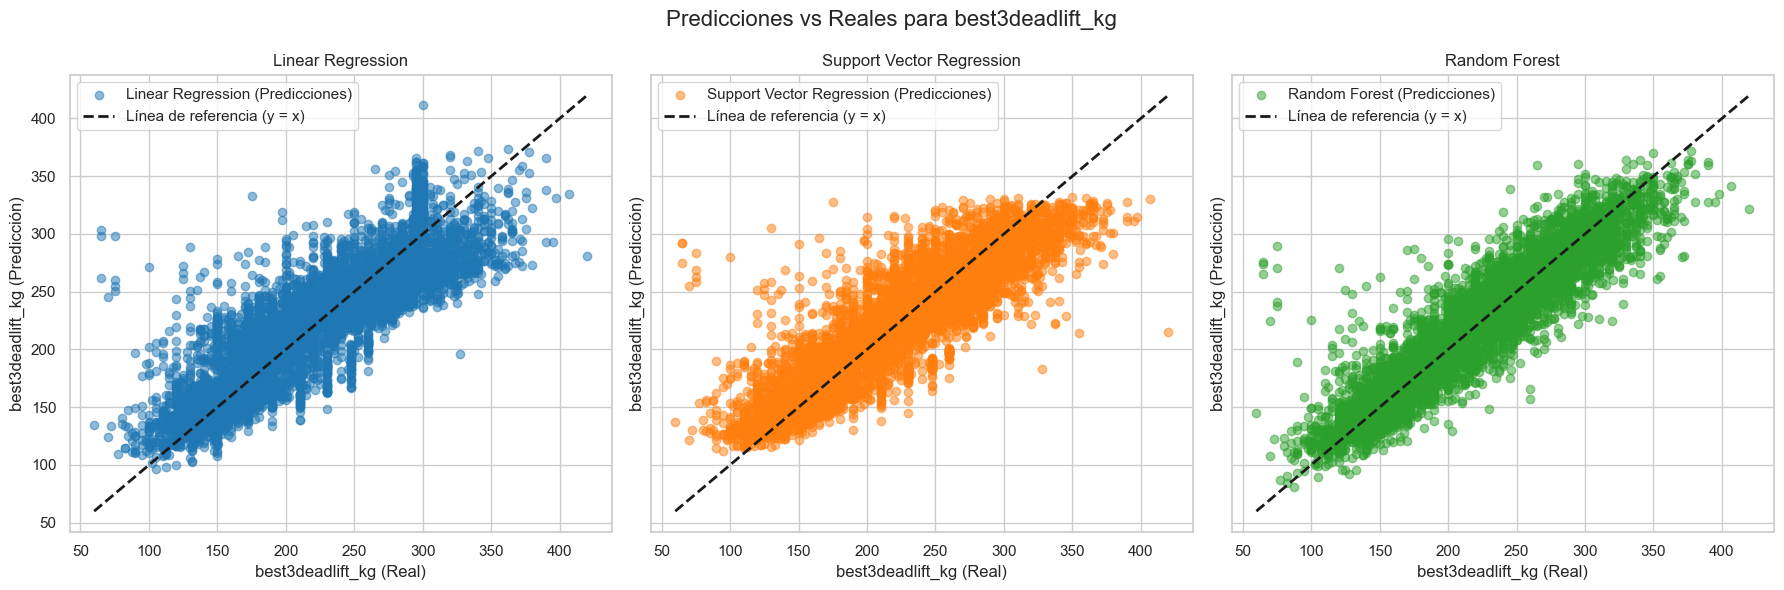

In [964]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de los gráficos
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12

# Paleta de colores (basada en recomendaciones de Claus Wilke)
colors = {'Linear Regression': '#1f77b4',  # Azul
          'Support Vector Regression': '#ff7f0e',  # Naranja
          'Random Forest': '#2ca02c'}  # Verde

# Función para graficar predicciones vs datos originales en subgráficos
def plot_predictions_multiple(y_test, y_pred_dict, target_name):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
    fig.suptitle(f'Predicciones vs Reales para {target_name}', fontsize=16)
    
    for i, (model_name, y_pred) in enumerate(y_pred_dict.items()):
        ax = axes[i]
        ax.scatter(y_test, y_pred, alpha=0.5, color=colors[model_name], label=f'{model_name} (Predicciones)')
        ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Línea de referencia (y = x)')
        ax.set_xlabel(f'{target_name} (Real)')
        ax.set_ylabel(f'{target_name} (Predicción)')
        ax.set_title(model_name)
        ax.legend()
    
    plt.tight_layout()
    plt.show()

# Predecir y graficar para best3squat_kg
y_squat_pred_dict = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_squat_train)
    y_squat_pred_dict[model_name] = model.predict(X_test_scaled)
plot_predictions_multiple(y_squat_test, y_squat_pred_dict, 'best3squat_kg')

# Predecir y graficar para best3bench_kg
y_bench_pred_dict = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_bench_train)
    y_bench_pred_dict[model_name] = model.predict(X_test_scaled)
plot_predictions_multiple(y_bench_test, y_bench_pred_dict, 'best3bench_kg')

# Predecir y graficar para best3deadlift_kg
y_deadlift_pred_dict = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_deadlift_train)
    y_deadlift_pred_dict[model_name] = model.predict(X_test_scaled)
plot_predictions_multiple(y_deadlift_test, y_deadlift_pred_dict, 'best3deadlift_kg')

Observaciones por Modelo:

- Regresión Lineal Múltiple (Izquierda - Azul)

    Distribución de los puntos: Hay una tendencia alineada con la línea y=xy=x, pero con más dispersión en los valores altos.
    Problema observado: Parece subestimar o sobrestimar algunos valores, lo que indica que el modelo no captura bien la complejidad de los datos.
    Conclusión: La regresión lineal no es la mejor opción si hay relaciones no lineales en los datos.

- Support Vector Regression (Centro - Naranja)

    Distribución de los puntos: Se observa más dispersión en valores altos, lo que indica que el modelo no está generalizando bien en esos casos.
    Problema observado: Parece que el modelo tiende a "aplanar" las predicciones, lo que es común en SVR con kernels lineales o mal ajustados.
    Conclusión: Puede que el modelo esté subestimando valores altos y no capture la complejidad de los datos.

- Random Forest (Derecha - Verde)

    Distribución de los puntos: Los valores están mucho más alineados con la línea de referencia, con menor dispersión.
    Conclusión: Este modelo tiene el mejor desempeño en comparación con los otros, ya que las predicciones se acercan más a los valores reales.

Conclusiones Gráficos

✔ Random Forest es el mejor modelo en este caso, ya que sus predicciones están más alineadas con los valores reales.

✔ La regresión lineal y SVR no capturan bien las relaciones complejas en los datos, especialmente para valores altos.

✔ Se podría mejorar aún más Random Forest con optimización de hiperparámetros (como número de árboles o profundidad máxima).

Conclusión final

    Random Forest es el modelo más adecuado para predecir los tres targets (best3squat_kg, best3bench_kg, best3deadlift_kg) debido a su alto rendimiento y capacidad para capturar relaciones complejas en los datos.

    Multiple Linear Regression puede ser útil si la interpretabilidad es una prioridad, pero su rendimiento es inferior.

    SVR no es recomendable en este caso, ya que no ofrece ventajas significativas sobre Multiple Linear Regression y es más complejo.

Recomendaciones

    - Usar Random Forest como modelo principal:

        Dado que Random Forest tiene el mejor rendimiento en términos de RMSE y R², es el modelo recomendado para predecir los tres targets.

        Random Forest es capaz de capturar relaciones no lineales y complejas en los datos, lo que lo hace más adecuado para este tipo de problemas.

    - Considerar Multiple Linear Regression o SVR para interpretabilidad:

        Si la interpretabilidad del modelo es importante (por ejemplo, para entender el impacto de cada variable independiente en los targets), Multiple Linear Regression puede ser una opción, aunque su rendimiento sea inferior.

        SVR no es recomendable en este caso, ya que su rendimiento es similar al de Multiple Linear Regression pero es más complejo y menos interpretable.

    - Optimizar Random Forest:

        Para mejorar aún más el rendimiento de Random Forest, considera ajustar sus hiperparámetros (por ejemplo, n_estimators, max_depth, min_samples_split) mediante técnicas como Grid Search o Byesian Search.

        También se puede explorar el uso de Gradient Boosting (como XGBoost o LightGBM), que suele tener un rendimiento similar o superior a Random Forest.

    - Manejo de datos faltantes:

        Si hay valores faltantes en los datos, hay que manejarlos adecuadamente antes de entrenar los modelos. Por ejemplo, puedes usar técnicas de imputación basadas en la mediana o en modelos predictivos.


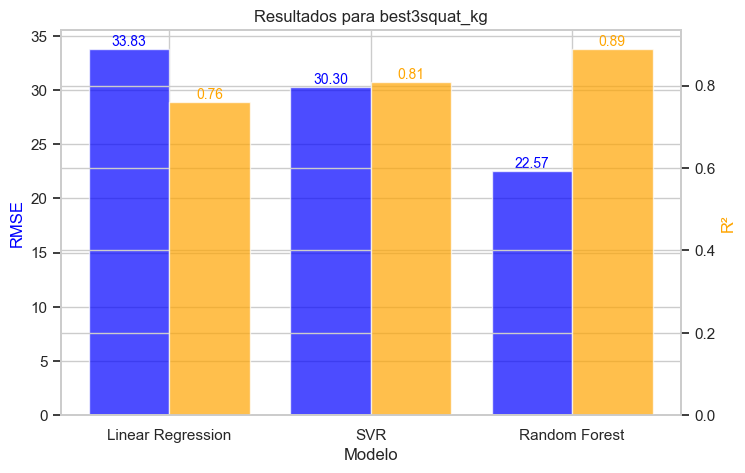

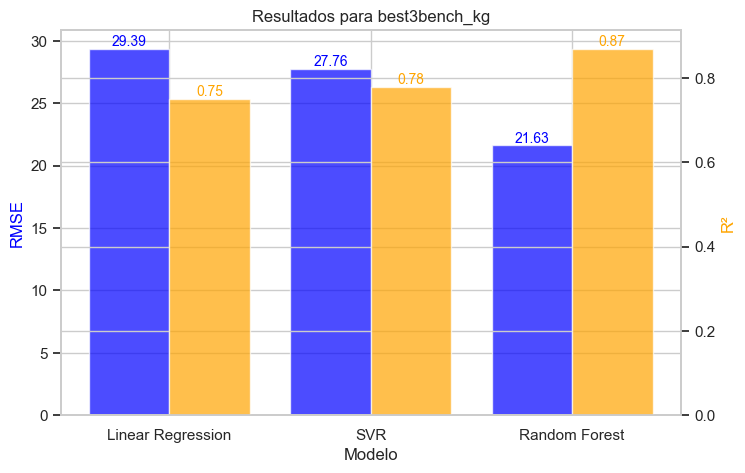

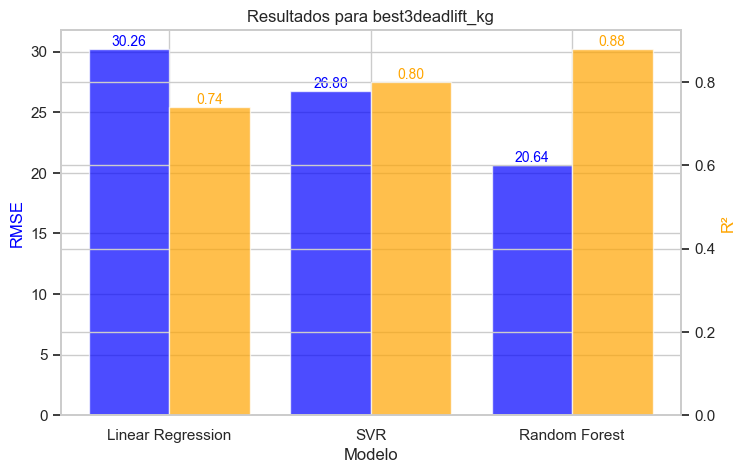

In [966]:
import numpy as np
import matplotlib.pyplot as plt

def plot_metrics(title, metrics, values):
    fig, ax1 = plt.subplots(figsize=(8, 5))
    ax2 = ax1.twinx()
    
    width = 0.4
    x = np.arange(len(metrics))
    
    bars1 = ax1.bar(x - width/2, values['RMSE'], width, label='RMSE', color='blue', alpha=0.7)
    bars2 = ax2.bar(x + width/2, values['R2'], width, label='R²', color='orange', alpha=0.7)
    
    ax1.set_xlabel('Modelo')
    ax1.set_ylabel('RMSE', color='blue')
    ax2.set_ylabel('R²', color='orange')
    
    ax1.set_xticks(x)
    ax1.set_xticklabels(metrics)
    ax1.set_title(title)
    
    for bar in bars1:
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.2f}', 
                 ha='center', va='bottom', fontsize=10, color='blue')
    
    for bar in bars2:
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.2f}', 
                 ha='center', va='bottom', fontsize=10, color='orange')
    
    plt.show()

models = ['Linear Regression', 'SVR', 'Random Forest']

data = {
    'best3squat_kg': {'RMSE': [33.83, 30.30, 22.57], 'R2': [0.76, 0.81, 0.89]},
    'best3bench_kg': {'RMSE': [29.39, 27.76, 21.63], 'R2': [0.75, 0.78, 0.87]},
    'best3deadlift_kg': {'RMSE': [30.26, 26.80, 20.64], 'R2': [0.74, 0.80, 0.88]}
}

for key, values in data.items():
    plot_metrics(f'Resultados para {key}', models, values)


In [967]:
df.head()

,name,age,age_class,bodyweight_kg,weight_class_kg,best3squat_kg,best3bench_kg,best3deadlift_kg,place,date,...,division_Light,division_Masters 1,division_Masters 2,division_Masters 3,division_Masters 4,division_Middle,division_Open,division_Sub-Juniors,division_Super,division_SuperHeavy
39704,Joe Spack,31.5,4,75.00,28,210.92,129.27,285.76,25,1973-11-09,...,False,False,False,False,False,False,True,False,False,False
39725,M. Kananda,31.5,4,83.46,35,255.00,165.00,260.00,32,1973-11-09,...,False,False,False,False,False,False,True,False,False,False
39726,Bill Seno,31.5,4,100.00,0,290.30,238.14,303.91,0,1973-11-09,...,False,False,False,False,False,False,True,False,False,False
39727,Jim Taylor #1,31.5,4,100.00,0,256.29,145.15,301.64,11,1973-11-09,...,False,False,False,False,False,False,True,False,False,False
39728,Edward Ravenscroft,31.5,4,100.00,0,301.64,185.00,280.00,32,1973-11-09,...,False,False,False,False,False,False,True,False,False,False
